In [62]:
# !rm -rf sample_data
# !git clone https://github.com/pbaylies/stylegan-encoder

In [23]:
!nvidia-smi

Wed Sep  8 05:20:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:06:00.0 Off |                    0 |
| N/A   52C    P0   205W / 300W |  21070MiB / 32510MiB |     99%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   

In [60]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]='4, 7'

In [2]:
cd stylegan-encoder

/root/practice/stgan1/stylegan-encoder


In [3]:
ls

CelebAMask-HQ.zip                      config.py*              raw_images/
LICENSE.txt*                           data/                   requirements.txt
Learn_direction_in_latent_space.ipynb  dataset_tool.py*        robust_loss/
Play_with_latent_directions.ipynb      dnnlib/                 run_metrics.py*
README.md*                             encode_images.py        swa.py
StyleGAN_Encoder_Tutorial.ipynb        encoder/                teaser.png
__pycache__/                           ffhq_dataset/           testtxt.txt
adaptive.py                            generate_figures.py*    train.py*
align_images.py                        metrics/                train_effnet.py
aligned_images/                        mona_example.jpg        train_resnet.py
cache/                                 pretrained_example.py*  training/


In [4]:
import os
print(os.getcwd())

/root/practice/stgan1/stylegan-encoder


Found 30000 images in raw_images
30000 images


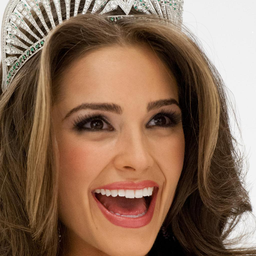

0 / 30000


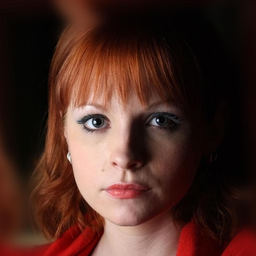

1000 / 30000


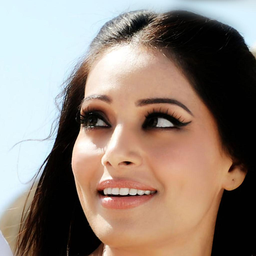

2000 / 30000


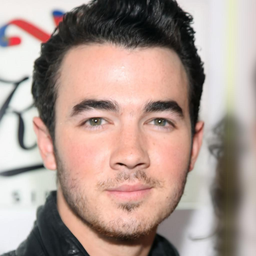

3000 / 30000


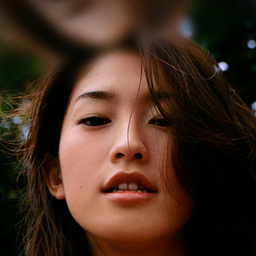

4000 / 30000


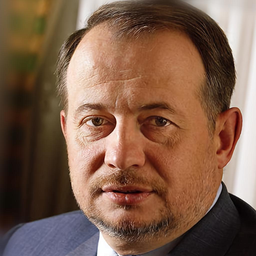

5000 / 30000


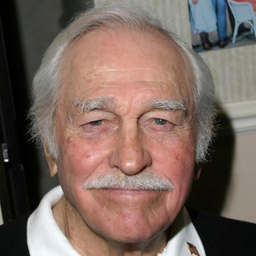

6000 / 30000


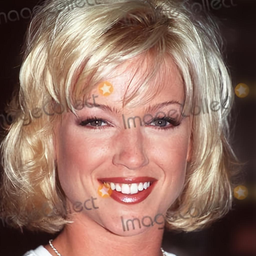

7000 / 30000


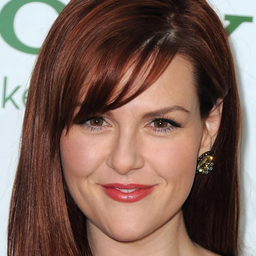

8000 / 30000


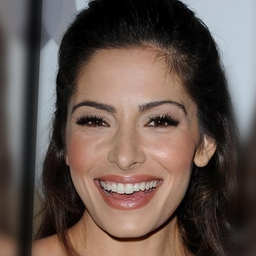

9000 / 30000


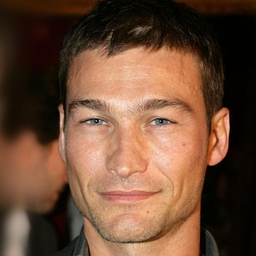

10000 / 30000


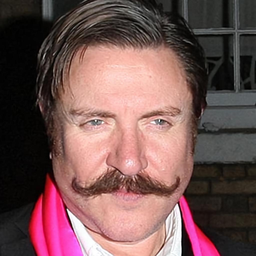

11000 / 30000


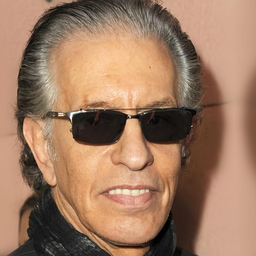

12000 / 30000


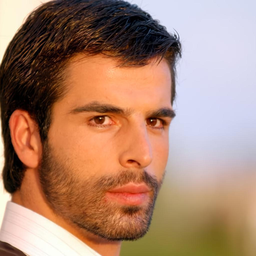

13000 / 30000


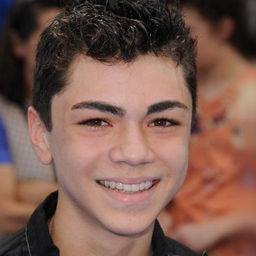

14000 / 30000


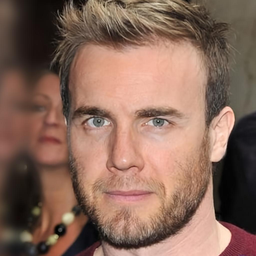

15000 / 30000


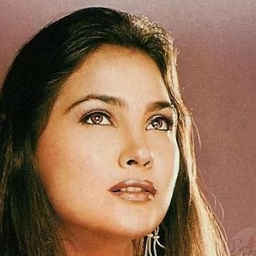

16000 / 30000


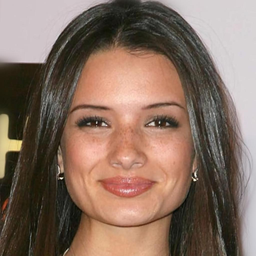

17000 / 30000


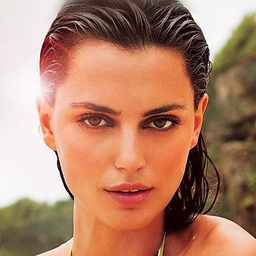

18000 / 30000


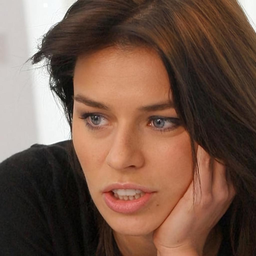

19000 / 30000


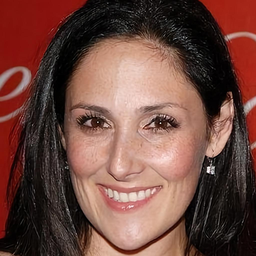

20000 / 30000


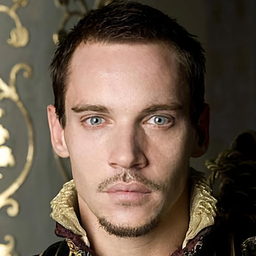

21000 / 30000


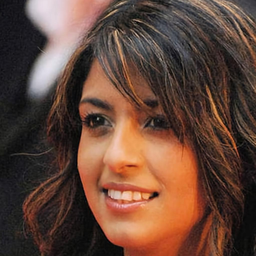

22000 / 30000


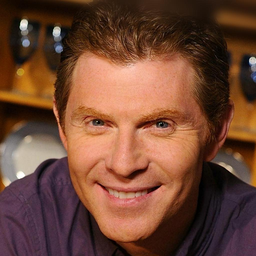

23000 / 30000


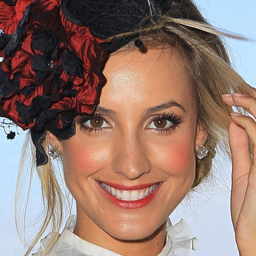

24000 / 30000


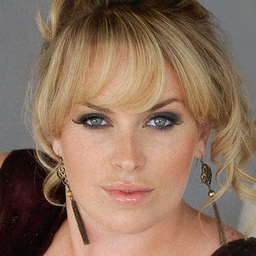

25000 / 30000


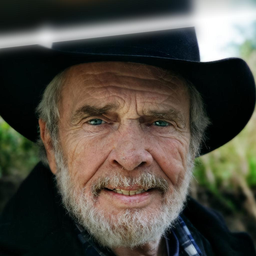

26000 / 30000


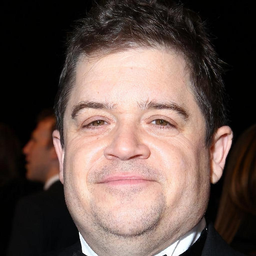

27000 / 30000


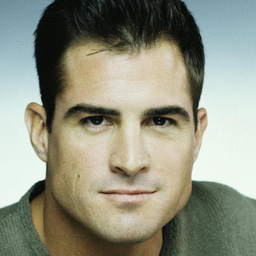

28000 / 30000


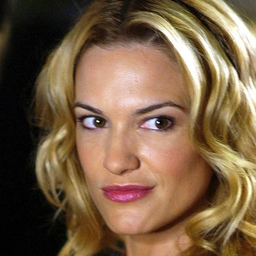

29000 / 30000


In [6]:
from PIL import Image
import os
imgs = sorted(os.listdir('raw_images'))

print("Found %d images in %s" %(len(imgs), 'raw_images'))
if len(imgs) == 0:
    print("Upload images to the \"raw_images\" folder!")
else:
    print("%d images"%len(imgs))

i = 0

for img_path in imgs:
    img = Image.open('raw_images/' + img_path)

    w,h = img.size
    rescale_ratio = 256 / min(w,h)
    img = img.resize((int(rescale_ratio*w),int(rescale_ratio*h)), Image.LANCZOS)
    
    if i % 1000 ==0 :
        display(img)
        print(i, '/', len(imgs))
    i += 1

In [15]:
#%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


In [29]:
!python align_images.py raw_images/ aligned_images/ --output_size=1024

64045056/64040097 [==============================] - 5728s 89us/step
Aligning 3939.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3939_01.png
Aligning 10062.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10062_01.png
Aligning 21859.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21859_01.png
Aligning 4997.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4997_01.png
Aligning 11514.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11514_01.png
Aligning 13013.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13013_01.png
Aligning 19554.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19554_01.png
Aligning 28584.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28584_01.png
Aligning 452.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/3982_01.png
Aligning 12631.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12631_01.png
Aligning 11673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11673_01.png
Aligning 27572.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27572_01.png
Starting face alignment...
Wrote result aligned_images/27572_02.png
Aligning 20958.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20958_01.png
Aligning 6235.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6235_01.png
Aligning 19961.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19961_01.png
Aligning 19090.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19090_01.png
Aligning 9962.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result 

Starting face alignment...
Wrote result aligned_images/25069_01.png
Aligning 5925.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5925_01.png
Aligning 16221.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16221_01.png
Aligning 9397.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9397_01.png
Aligning 21908.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21908_01.png
Aligning 18841.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18841_01.png
Aligning 3188.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3188_01.png
Aligning 5037.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5037_01.png
Aligning 9326.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9326_01.png
Aligning 10802.jpg ...
Getting landmarks...
St

Wrote result aligned_images/10395_01.png
Aligning 18865.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18865_01.png
Aligning 5238.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5238_01.png
Aligning 21215.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21215_01.png
Aligning 2977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2977_01.png
Aligning 10793.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10793_01.png
Aligning 28523.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28523_01.png
Aligning 28917.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28917_01.png
Aligning 16513.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16513_01.png
Aligning 17548.jpg ...
Getting landmarks...
Starting face alignment

Wrote result aligned_images/12736_01.png
Aligning 9320.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9320_01.png
Aligning 8237.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8237_01.png
Aligning 25957.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25957_01.png
Aligning 13033.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13033_01.png
Aligning 10378.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10378_01.png
Aligning 7524.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7524_01.png
Aligning 14248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14248_01.png
Aligning 19629.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19629_01.png
Aligning 28993.jpg ...
Getting landmarks...
Starting face alignment..

Wrote result aligned_images/12667_01.png
Aligning 10888.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10888_01.png
Aligning 23614.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23614_01.png
Aligning 22633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22633_01.png
Aligning 13036.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13036_01.png
Aligning 6713.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6713_01.png
Aligning 10075.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10075_01.png
Aligning 5792.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5792_01.png
Aligning 17940.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17940_01.png
Aligning 22644.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/9415_01.png
Aligning 25719.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25719_01.png
Aligning 5494.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5494_01.png
Aligning 5207.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5207_01.png
Aligning 18808.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18808_01.png
Aligning 5274.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5274_01.png
Aligning 24264.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24264_01.png
Aligning 13864.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13864_01.png
Aligning 17778.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17778_01.png
Aligning 18908.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/22919_01.png
Aligning 29180.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29180_01.png
Aligning 21982.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21982_01.png
Aligning 8336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8336_01.png
Aligning 18547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18547_01.png
Aligning 5802.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5802_01.png
Aligning 21648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21648_01.png
Aligning 24571.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24571_01.png
Aligning 28398.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28398_01.png
Aligning 23415.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/17993_01.png
Aligning 5008.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5008_01.png
Aligning 11390.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11390_01.png
Aligning 25698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25698_01.png
Aligning 20269.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20269_01.png
Aligning 5699.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5699_01.png
Aligning 23613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23613_01.png
Aligning 22370.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22370_01.png
Aligning 12802.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12802_01.png
Aligning 15975.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/7710_01.png
Aligning 8822.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8822_01.png
Aligning 25264.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25264_01.png
Aligning 13295.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13295_01.png
Aligning 4558.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4558_01.png
Aligning 17078.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17078_01.png
Aligning 17721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17721_01.png
Aligning 22198.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22198_01.png
Aligning 11426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11426_01.png
Aligning 566.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/1051_01.png
Aligning 15226.jpg ...
Getting landmarks...
Aligning 2941.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2941_01.png
Aligning 8082.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8082_01.png
Aligning 22850.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22850_01.png
Aligning 6336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6336_01.png
Aligning 18204.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18204_01.png
Aligning 11062.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11062_01.png
Aligning 5437.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5437_01.png
Aligning 24426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24426_01.png
A

Starting face alignment...
Wrote result aligned_images/3588_01.png
Aligning 8024.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8024_01.png
Aligning 29666.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29666_01.png
Aligning 26591.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26591_01.png
Aligning 4554.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4554_01.png
Aligning 13086.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13086_01.png
Aligning 2959.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2959_01.png
Aligning 5778.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5778_01.png
Aligning 16177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16177_01.png
Aligning 5297.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/17397_01.png
Aligning 10160.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10160_01.png
Aligning 29200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29200_01.png
Aligning 25297.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25297_01.png
Aligning 18781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18781_01.png
Aligning 17507.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17507_01.png
Aligning 15133.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15133_01.png
Aligning 25445.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25445_01.png
Aligning 10711.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10711_01.png
Aligning 2960.jpg ...
Getting landma

Starting face alignment...
Wrote result aligned_images/20827_01.png
Aligning 22975.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22975_01.png
Aligning 11227.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11227_01.png
Aligning 20816.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20816_01.png
Aligning 29485.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29485_01.png
Aligning 24388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24388_01.png
Aligning 6049.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6049_01.png
Aligning 29868.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29868_01.png
Aligning 21472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21472_01.png
Aligning 3883.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/28546_01.png
Aligning 7719.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7719_01.png
Aligning 25901.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25901_01.png
Aligning 11349.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11349_01.png
Aligning 27381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27381_01.png
Aligning 25662.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25662_01.png
Aligning 16870.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16870_01.png
Aligning 18984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18984_01.png
Aligning 2281.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2281_01.png
Aligning 22240.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/25436_01.png
Aligning 18438.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18438_01.png
Aligning 11823.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11823_01.png
Aligning 3472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3472_01.png
Aligning 4362.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4362_01.png
Aligning 24423.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24423_01.png
Aligning 29939.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29939_01.png
Aligning 28256.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28256_01.png
Aligning 14699.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14699_01.png
Aligning 15442.jpg ...
Getting landmarks

Wrote result aligned_images/26967_01.png
Aligning 14217.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14217_01.png
Aligning 11545.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11545_01.png
Aligning 10028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10028_01.png
Aligning 13241.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13241_01.png
Aligning 20367.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20367_01.png
Aligning 1734.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1734_01.png
Aligning 3455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3455_01.png
Aligning 24348.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24348_01.png
Aligning 1471.jpg ...
Getting landmarks...
Starting face alignment.

Wrote result aligned_images/19057_01.png
Aligning 27563.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27563_01.png
Aligning 19339.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19339_01.png
Aligning 12665.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12665_01.png
Aligning 7561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7561_01.png
Aligning 14598.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14598_01.png
Aligning 40.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/40_01.png
Aligning 5814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5814_01.png
Aligning 12291.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12291_01.png
Aligning 26038.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Starting face alignment...
Wrote result aligned_images/13601_01.png
Aligning 7095.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7095_01.png
Aligning 28508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28508_01.png
Aligning 3732.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3732_01.png
Aligning 7834.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7834_01.png
Aligning 195.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/195_01.png
Aligning 25812.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25812_01.png
Aligning 25872.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25872_01.png
Aligning 26179.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26179_01.png
Aligning 8458.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/13626_01.png
Aligning 28770.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28770_01.png
Aligning 23604.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23604_01.png
Aligning 7178.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7178_01.png
Aligning 24310.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24310_01.png
Aligning 9179.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9179_01.png
Aligning 16239.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16239_01.png
Aligning 22356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22356_01.png
Aligning 20470.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20470_01.png
Aligning 6707.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/11090_01.png
Aligning 25153.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25153_01.png
Aligning 7238.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7238_01.png
Aligning 16095.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16095_01.png
Aligning 1940.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1940_01.png
Aligning 9294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9294_01.png
Aligning 5753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5753_01.png
Aligning 19486.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19486_01.png
Aligning 25798.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25798_01.png
Aligning 27468.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/899_01.png
Aligning 28044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28044_01.png
Aligning 6910.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6910_01.png
Aligning 4370.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4370_01.png
Aligning 1957.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1957_01.png
Aligning 4906.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4906_01.png
Aligning 20927.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20927_01.png
Aligning 12534.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12534_01.png
Aligning 2513.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2513_01.png
Aligning 14146.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/10308_01.png
Aligning 14737.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14737_01.png
Aligning 26887.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26887_01.png
Aligning 24172.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24172_01.png
Aligning 3294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3294_01.png
Aligning 20782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20782_01.png
Aligning 6249.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6249_01.png
Aligning 4603.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4603_01.png
Aligning 14862.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14862_01.png
Aligning 13902.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/16514_01.png
Aligning 21120.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21120_01.png
Aligning 7239.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7239_01.png
Aligning 24241.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24241_01.png
Aligning 17806.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17806_01.png
Aligning 1531.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1531_01.png
Aligning 23494.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23494_01.png
Aligning 25147.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25147_01.png
Aligning 6501.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6501_01.png
Aligning 5249.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/21698_01.png
Aligning 29028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29028_01.png
Aligning 20703.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20703_01.png
Aligning 11888.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11888_01.png
Aligning 17945.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17945_01.png
Aligning 7730.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7730_01.png
Aligning 552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/552_01.png
Aligning 21706.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21706_01.png
Aligning 17609.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17609_01.png
Aligning 26033.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/15088_01.png
Aligning 5844.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5844_01.png
Aligning 12040.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12040_01.png
Aligning 29134.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29134_01.png
Aligning 25342.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25342_01.png
Aligning 17574.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17574_01.png
Aligning 4376.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4376_01.png
Aligning 14859.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14859_01.png
Aligning 22505.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22505_01.png
Aligning 8087.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/15505_01.png
Aligning 14780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14780_01.png
Aligning 4262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4262_01.png
Aligning 15909.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15909_01.png
Aligning 3933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3933_01.png
Aligning 10902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10902_01.png
Aligning 4096.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4096_01.png
Aligning 1132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1132_01.png
Aligning 27418.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27418_01.png
Aligning 3587.jpg ...
Getting landmarks...
S

Wrote result aligned_images/788_01.png
Aligning 14613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14613_01.png
Aligning 8400.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8400_01.png
Aligning 20527.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20527_01.png
Aligning 19721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19721_01.png
Aligning 11268.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11268_01.png
Aligning 1165.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1165_01.png
Aligning 12507.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12507_01.png
Aligning 2282.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2282_01.png
Aligning 23575.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/21850_01.png
Aligning 18987.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18987_01.png
Aligning 16622.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16622_01.png
Aligning 22200.jpg ...
Getting landmarks...
Aligning 15108.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15108_01.png
Aligning 6779.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6779_01.png
Aligning 4105.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4105_01.png
Aligning 28621.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28621_01.png
Aligning 28116.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28116_01.png
Aligning 11833.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11833_01.

Starting face alignment...
Wrote result aligned_images/16535_01.png
Aligning 279.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/279_01.png
Aligning 27776.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27776_01.png
Aligning 12973.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12973_01.png
Aligning 22477.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22477_01.png
Aligning 21429.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21429_01.png
Aligning 8044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8044_01.png
Aligning 27445.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27445_01.png
Aligning 7466.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7466_01.png
Aligning 17656.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/21241_01.png
Aligning 7038.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7038_01.png
Aligning 12468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12468_01.png
Aligning 189.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/189_01.png
Aligning 23541.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23541_01.png
Aligning 4652.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4652_01.png
Aligning 381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/381_01.png
Aligning 9690.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9690_01.png
Aligning 7429.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7429_01.png
Aligning 20855.jpg ...
Getting landmarks...
Starting

Starting face alignment...
Wrote result aligned_images/4201_01.png
Aligning 20020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20020_01.png
Aligning 254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/254_01.png
Aligning 8720.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8720_01.png
Aligning 17713.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17713_01.png
Aligning 11193.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11193_01.png
Aligning 17112.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17112_01.png
Aligning 939.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/939_01.png
Aligning 4152.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4152_01.png
Aligning 26105.jpg ...
Getting landmarks...
Start

Starting face alignment...
Wrote result aligned_images/25513_01.png
Aligning 6866.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6866_01.png
Aligning 1578.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1578_01.png
Aligning 11287.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11287_01.png
Aligning 22852.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22852_01.png
Aligning 28367.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28367_01.png
Aligning 4843.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4843_01.png
Aligning 11670.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11670_01.png
Aligning 21586.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21586_01.png
Aligning 19608.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/14798_01.png
Aligning 10205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10205_01.png
Aligning 18882.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18882_01.png
Aligning 29881.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29881_01.png
Aligning 8739.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8739_01.png
Aligning 1033.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1033_01.png
Aligning 29146.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29146_01.png
Aligning 26724.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26724_01.png
Aligning 19498.jpg ...
Getting landmarks...
Aligning 24117.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24117_01.

Starting face alignment...
Wrote result aligned_images/4476_01.png
Aligning 14904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14904_01.png
Aligning 24358.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24358_01.png
Aligning 6641.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6641_01.png
Aligning 17761.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17761_01.png
Aligning 13781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13781_01.png
Aligning 28793.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28793_01.png
Aligning 11139.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11139_01.png
Aligning 24757.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24757_01.png
Aligning 24369.jpg ...
Getting landmark

Wrote result aligned_images/13673_01.png
Aligning 16606.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16606_01.png
Aligning 11493.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11493_01.png
Aligning 9084.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9084_01.png
Aligning 19932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19932_01.png
Aligning 8480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8480_01.png
Aligning 21571.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21571_01.png
Aligning 2431.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2431_01.png
Aligning 17079.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17079_01.png
Aligning 18331.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/1275_01.png
Aligning 8705.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8705_01.png
Aligning 8115.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8115_01.png
Aligning 2002.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2002_01.png
Aligning 14066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14066_01.png
Aligning 10744.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10744_01.png
Aligning 14433.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14433_01.png
Aligning 22052.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22052_01.png
Aligning 1474.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1474_01.png
Aligning 1672.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/22491_01.png
Aligning 12061.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12061_01.png
Aligning 427.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/427_01.png
Aligning 13142.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13142_01.png
Aligning 27670.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27670_01.png
Aligning 25686.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25686_01.png
Aligning 21622.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21622_01.png
Aligning 29781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29781_01.png
Aligning 20407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20407_01.png
Aligning 20852.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/23257_01.png
Aligning 19205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19205_01.png
Aligning 18792.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18792_01.png
Aligning 15590.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15590_01.png
Aligning 6222.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6222_01.png
Aligning 25815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25815_01.png
Aligning 25337.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25337_01.png
Aligning 13313.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13313_01.png
Aligning 10636.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10636_01.png
Aligning 22908.jpg ...
Getting landmar

Wrote result aligned_images/8048_01.png
Aligning 21280.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21280_01.png
Aligning 15865.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15865_01.png
Aligning 25464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25464_01.png
Aligning 1555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1555_01.png
Aligning 22172.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22172_01.png
Aligning 27044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27044_01.png
Aligning 8858.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8858_01.png
Aligning 18820.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18820_01.png
Aligning 17324.jpg ...
Getting landmarks...
Starting face alignment.

Wrote result aligned_images/26948_01.png
Aligning 7686.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7686_01.png
Aligning 5356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5356_01.png
Aligning 12038.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12038_01.png
Aligning 4537.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4537_01.png
Aligning 20665.jpg ...
Getting landmarks...
Aligning 10722.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10722_01.png
Aligning 28280.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28280_01.png
Aligning 775.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/775_01.png
Aligning 23359.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23359_01.png
Aligning 6666.jpg ...
Getting

Starting face alignment...
Wrote result aligned_images/3068_01.png
Aligning 3388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3388_01.png
Aligning 10933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10933_01.png
Aligning 16345.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16345_01.png
Aligning 6170.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6170_01.png
Aligning 13569.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13569_01.png
Aligning 14251.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14251_01.png
Aligning 19642.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19642_01.png
Aligning 28293.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28293_01.png
Aligning 22578.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/26654_01.png
Aligning 25494.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25494_01.png
Aligning 17496.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17496_01.png
Aligning 15783.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15783_01.png
Aligning 27087.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27087_01.png
Aligning 9574.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9574_01.png
Aligning 15830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15830_01.png
Aligning 13148.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13148_01.png
Aligning 1969.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1969_01.png
Aligning 7446.jpg ...
Getting landmarks.

Wrote result aligned_images/29996_01.png
Aligning 25064.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25064_01.png
Aligning 14538.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14538_01.png
Aligning 17608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17608_01.png
Aligning 9706.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9706_01.png
Aligning 12371.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12371_01.png
Aligning 9295.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9295_01.png
Aligning 14503.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14503_01.png
Aligning 27870.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27870_01.png
Aligning 17355.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/20005_01.png
Aligning 9396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9396_01.png
Aligning 144.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/144_01.png
Aligning 7277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7277_01.png
Aligning 523.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/523_01.png
Aligning 6416.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6416_01.png
Aligning 7438.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7438_01.png
Aligning 5999.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5999_01.png
Aligning 12783.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12783_01.png
Aligning 2787.jpg ...
Getting landmarks...
Starting fa

Starting face alignment...
Wrote result aligned_images/11576_01.png
Aligning 10363.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10363_01.png
Aligning 2707.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2707_01.png
Aligning 21220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21220_01.png
Aligning 16456.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16456_01.png
Starting face alignment...
Wrote result aligned_images/16456_02.png
Aligning 2073.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2073_01.png
Aligning 426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/426_01.png
Aligning 27720.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27720_01.png
Aligning 18302.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result alig

Starting face alignment...
Wrote result aligned_images/25836_01.png
Aligning 29812.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29812_01.png
Aligning 22652.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22652_01.png
Aligning 25689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25689_01.png
Aligning 12701.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12701_01.png
Aligning 29567.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29567_01.png
Aligning 27247.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27247_01.png
Aligning 11559.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11559_01.png
Aligning 18560.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18560_01.png
Aligning 24008.jpg ...
Getting landm

Starting face alignment...
Wrote result aligned_images/23890_01.png
Aligning 29411.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29411_01.png
Aligning 18001.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18001_01.png
Aligning 15528.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15528_01.png
Aligning 866.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/866_01.png
Aligning 23327.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23327_01.png
Aligning 7467.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7467_01.png
Aligning 25276.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25276_01.png
Aligning 15760.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15760_01.png
Aligning 6203.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/7667_01.png
Aligning 29778.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29778_01.png
Aligning 8809.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8809_01.png
Aligning 1372.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1372_01.png
Aligning 18565.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18565_01.png
Aligning 2615.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2615_01.png
Aligning 5888.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5888_01.png
Aligning 16356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16356_01.png
Aligning 17898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17898_01.png
Aligning 13456.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/20698_01.png
Aligning 16109.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16109_01.png
Aligning 26983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26983_01.png
Aligning 23607.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23607_01.png
Aligning 15941.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15941_01.png
Aligning 20759.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20759_01.png
Aligning 12799.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12799_01.png
Aligning 22941.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22941_01.png
Aligning 545.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/545_01.png
Aligning 27351.jpg ...
Getting landmarks

Wrote result aligned_images/366_01.png
Aligning 5259.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5259_01.png
Aligning 10541.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10541_01.png
Aligning 22971.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22971_01.png
Aligning 17617.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17617_01.png
Aligning 27564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27564_01.png
Aligning 27347.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27347_01.png
Aligning 627.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/627_01.png
Aligning 534.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/534_01.png
Aligning 25331.jpg ...
Getting landmarks...
Starting face alignment...
Wrot

Wrote result aligned_images/4754_01.png
Aligning 13299.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13299_01.png
Aligning 13263.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13263_01.png
Aligning 24230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24230_01.png
Aligning 16890.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16890_01.png
Aligning 29249.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29249_01.png
Aligning 13150.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13150_01.png
Aligning 15143.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15143_01.png
Aligning 10681.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10681_01.png
Aligning 13712.jpg ...
Getting landmarks...
Starting face alignm

Starting face alignment...
Wrote result aligned_images/13476_01.png
Aligning 115.jpg ...
Getting landmarks...
Aligning 26736.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26736_01.png
Aligning 24939.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24939_01.png
Aligning 19250.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19250_01.png
Aligning 9628.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9628_01.png
Aligning 28236.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28236_01.png
Aligning 29794.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29794_01.png
Aligning 26205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26205_01.png
Aligning 16113.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16113_01.

Starting face alignment...
Wrote result aligned_images/13726_01.png
Aligning 21421.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21421_01.png
Aligning 15106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15106_01.png
Aligning 29838.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29838_01.png
Aligning 7977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7977_01.png
Aligning 21258.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21258_01.png
Aligning 3216.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3216_01.png
Aligning 27868.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27868_01.png
Aligning 15784.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15784_01.png
Aligning 27143.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/6534_01.png
Aligning 25395.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25395_01.png
Aligning 24926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24926_01.png
Aligning 3218.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3218_01.png
Aligning 24474.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24474_01.png
Aligning 19395.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19395_01.png
Aligning 7281.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7281_01.png
Aligning 29463.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29463_01.png
Aligning 12226.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12226_01.png
Aligning 970.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/7954_01.png
Aligning 3715.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3715_01.png
Aligning 20890.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20890_01.png
Aligning 25615.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25615_01.png
Aligning 14548.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14548_01.png
Aligning 907.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/907_01.png
Aligning 24785.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24785_01.png
Aligning 10970.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10970_01.png
Aligning 567.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/567_01.png
Aligning 1779.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/25202_01.png
Aligning 13823.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13823_01.png
Aligning 2036.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2036_01.png
Aligning 29208.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29208_01.png
Aligning 175.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/175_01.png
Aligning 28912.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28912_01.png
Aligning 11073.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11073_01.png
Aligning 21782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21782_01.png
Aligning 23152.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23152_01.png
Aligning 17978.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/2938_01.png
Aligning 14839.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14839_01.png
Aligning 2814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2814_01.png
Aligning 5255.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5255_01.png
Aligning 17137.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17137_01.png
Aligning 5484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5484_01.png
Aligning 7228.jpg ...
Getting landmarks...
Aligning 57.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/57_01.png
Aligning 1252.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1252_01.png
Aligning 19253.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19253_01.png
Aligning

Starting face alignment...
Wrote result aligned_images/25240_01.png
Aligning 6651.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6651_01.png
Aligning 9533.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9533_01.png
Aligning 4301.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4301_01.png
Aligning 5759.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5759_01.png
Aligning 6277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6277_01.png
Aligning 20361.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20361_01.png
Aligning 13318.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13318_01.png
Aligning 24409.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24409_01.png
Aligning 8866.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/22699_01.png
Aligning 22928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22928_01.png
Aligning 11643.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11643_01.png
Aligning 11926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11926_01.png
Aligning 15450.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15450_01.png
Aligning 2844.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2844_01.png
Aligning 6980.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6980_01.png
Aligning 19394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19394_01.png
Aligning 19429.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19429_01.png
Aligning 14392.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/15169_01.png
Aligning 25249.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25249_01.png
Aligning 10046.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10046_01.png
Aligning 9420.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9420_01.png
Aligning 16066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16066_01.png
Aligning 28511.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28511_01.png
Aligning 7016.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7016_01.png
Aligning 6301.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6301_01.png
Aligning 27248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27248_01.png
Aligning 1767.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/17906_01.png
Aligning 12443.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12443_01.png
Aligning 27028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27028_01.png
Aligning 26331.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26331_01.png
Aligning 1108.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1108_01.png
Aligning 23579.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23579_01.png
Aligning 14200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14200_01.png
Aligning 14893.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14893_01.png
Aligning 24160.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24160_01.png
Aligning 14987.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/29465_01.png
Aligning 9145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9145_01.png
Aligning 19187.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19187_01.png
Aligning 13245.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13245_01.png
Aligning 27848.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27848_01.png
Aligning 24483.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24483_01.png
Aligning 3111.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3111_01.png
Aligning 22110.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22110_01.png
Aligning 21164.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21164_01.png
Aligning 5705.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/23404_01.png
Aligning 24065.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24065_01.png
Aligning 22784.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22784_01.png
Aligning 18161.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18161_01.png
Aligning 21358.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21358_01.png
Aligning 19391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19391_01.png
Aligning 9941.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9941_01.png
Aligning 7233.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7233_01.png
Aligning 22349.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22349_01.png
Aligning 3826.jpg ...
Getting landmarks.

Wrote result aligned_images/14434_01.png
Aligning 9164.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9164_01.png
Aligning 28261.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28261_01.png
Aligning 23588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23588_01.png
Aligning 25988.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25988_01.png
Aligning 5323.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5323_01.png
Starting face alignment...
Wrote result aligned_images/5323_02.png
Aligning 18214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18214_01.png
Aligning 14700.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14700_01.png
Aligning 6237.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6237_01.png
Al

Starting face alignment...
Wrote result aligned_images/22542_01.png
Aligning 29740.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29740_01.png
Aligning 2326.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2326_01.png
Aligning 16479.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16479_01.png
Aligning 24245.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24245_01.png
Aligning 29153.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29153_01.png
Aligning 13239.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13239_01.png
Aligning 10552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10552_01.png
Aligning 18838.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18838_01.png
Aligning 23971.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/16129_01.png
Aligning 25390.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25390_01.png
Aligning 3049.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3049_01.png
Aligning 16924.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16924_01.png
Aligning 5124.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5124_01.png
Aligning 19359.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19359_01.png
Aligning 11210.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11210_01.png
Aligning 9005.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9005_01.png
Aligning 25156.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25156_01.png
Aligning 21330.jpg ...
Getting landmarks..

Wrote result aligned_images/14049_01.png
Aligning 13466.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13466_01.png
Aligning 29155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29155_01.png
Aligning 21729.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21729_01.png
Aligning 9214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9214_01.png
Aligning 5467.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5467_01.png
Aligning 27419.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27419_01.png
Aligning 272.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/272_01.png
Aligning 21983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21983_01.png
Aligning 24734.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/4196_01.png
Aligning 23007.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23007_01.png
Aligning 24135.jpg ...
Getting landmarks...
Aligning 28787.jpg ...
Getting landmarks...
Aligning 16371.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16371_01.png
Aligning 12367.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12367_01.png
Aligning 28619.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28619_01.png
Aligning 7396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7396_01.png
Aligning 18407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18407_01.png
Aligning 27467.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27467_01.png
Aligning 17302.jpg ...
Getting landmarks...
Starting face align

Starting face alignment...
Wrote result aligned_images/3225_01.png
Aligning 25224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25224_01.png
Aligning 5205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5205_01.png
Aligning 8308.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8308_01.png
Aligning 7048.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7048_01.png
Aligning 2667.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2667_01.png
Aligning 1934.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1934_01.png
Aligning 24573.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24573_01.png
Aligning 16203.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16203_01.png
Aligning 9342.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/24717_01.png
Aligning 26221.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26221_01.png
Aligning 117.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/117_01.png
Aligning 13967.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13967_01.png
Aligning 25570.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25570_01.png
Aligning 7453.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7453_01.png
Aligning 19690.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19690_01.png
Aligning 18734.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18734_01.png
Aligning 19937.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19937_01.png
Aligning 8406.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/27476_01.png
Aligning 15092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15092_01.png
Aligning 3062.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3062_01.png
Aligning 391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/391_01.png
Aligning 19305.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19305_01.png
Aligning 25017.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25017_01.png
Aligning 26607.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26607_01.png
Aligning 16607.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16607_01.png
Aligning 6428.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6428_01.png
Aligning 13575.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/27680_01.png
Starting face alignment...
Wrote result aligned_images/27680_02.png
Aligning 10567.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10567_01.png
Aligning 22377.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22377_01.png
Aligning 16399.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16399_01.png
Aligning 6597.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6597_01.png
Aligning 24418.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24418_01.png
Aligning 9096.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9096_01.png
Aligning 318.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/318_01.png
Aligning 17437.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result alig

Starting face alignment...
Wrote result aligned_images/15530_01.png
Aligning 8361.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8361_01.png
Aligning 9441.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9441_01.png
Aligning 11386.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11386_01.png
Aligning 6755.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6755_01.png
Aligning 25235.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25235_01.png
Aligning 14440.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14440_01.png
Aligning 12201.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12201_01.png
Aligning 16373.jpg ...
Getting landmarks...
Aligning 7665.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7665_01.png


Starting face alignment...
Wrote result aligned_images/26624_01.png
Aligning 19424.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19424_01.png
Aligning 5476.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5476_01.png
Aligning 6481.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6481_01.png
Aligning 15552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15552_01.png
Aligning 28173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28173_01.png
Aligning 14781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14781_01.png
Aligning 28106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28106_01.png
Aligning 24602.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24602_01.png
Aligning 612.jpg ...
Getting landmarks..

Wrote result aligned_images/14153_01.png
Aligning 5564.jpg ...
Getting landmarks...
Aligning 29444.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29444_01.png
Aligning 19918.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19918_01.png
Aligning 14266.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14266_01.png
Aligning 15489.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15489_01.png
Aligning 10412.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10412_01.png
Aligning 28785.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28785_01.png
Aligning 5603.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5603_01.png
Aligning 10529.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10529_01.png
Aligning 10551.jpg ...

Starting face alignment...
Wrote result aligned_images/6902_01.png
Aligning 17491.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17491_01.png
Aligning 1789.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1789_01.png
Aligning 3753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3753_01.png
Aligning 17200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17200_01.png
Aligning 12619.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12619_01.png
Aligning 3501.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3501_01.png
Aligning 4345.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4345_01.png
Aligning 29093.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29093_01.png
Aligning 7846.jpg ...
Getting landmarks...
St

Wrote result aligned_images/26012_01.png
Aligning 20299.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20299_01.png
Aligning 24869.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24869_01.png
Aligning 21453.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21453_01.png
Aligning 1446.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1446_01.png
Aligning 28246.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28246_01.png
Aligning 8854.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8854_01.png
Aligning 579.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/579_01.png
Aligning 21537.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21537_01.png
Aligning 17073.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/21076_01.png
Aligning 145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/145_01.png
Aligning 12982.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12982_01.png
Aligning 25947.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25947_01.png
Aligning 5543.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5543_01.png
Aligning 5336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5336_01.png
Aligning 22709.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22709_01.png
Aligning 22588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22588_01.png
Aligning 18932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18932_01.png
Aligning 16382.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/28431_01.png
Aligning 12519.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12519_01.png
Aligning 14480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14480_01.png
Aligning 27357.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27357_01.png
Aligning 14615.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14615_01.png
Aligning 18374.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18374_01.png
Aligning 25275.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25275_01.png
Aligning 12312.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12312_01.png
Aligning 4721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4721_01.png
Aligning 20126.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/11370_01.png
Aligning 23393.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23393_01.png
Aligning 698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/698_01.png
Aligning 21167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21167_01.png
Aligning 15162.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15162_01.png
Aligning 13228.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13228_01.png
Aligning 9863.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9863_01.png
Aligning 13436.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13436_01.png
Aligning 2658.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2658_01.png
Aligning 29144.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/4445_01.png
Aligning 2903.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2903_01.png
Aligning 9714.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9714_01.png
Aligning 14708.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14708_01.png
Aligning 20560.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20560_01.png
Aligning 12462.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12462_01.png
Aligning 18898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18898_01.png
Aligning 11705.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11705_01.png
Aligning 9273.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9273_01.png
Aligning 3671.jpg ...
Getting landmarks...


Wrote result aligned_images/8917_01.png
Aligning 3575.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3575_01.png
Aligning 28387.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28387_01.png
Aligning 20224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20224_01.png
Aligning 13428.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13428_01.png
Aligning 5190.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5190_01.png
Aligning 12216.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12216_01.png
Aligning 12366.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12366_01.png
Aligning 9169.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9169_01.png
Aligning 4107.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/23543_01.png
Aligning 27364.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27364_01.png
Aligning 14092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14092_01.png
Aligning 8473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8473_01.png
Aligning 28860.jpg ...
Getting landmarks...
Aligning 27338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27338_01.png
Aligning 16900.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16900_01.png
Aligning 23223.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23223_01.png
Aligning 12705.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12705_01.png
Aligning 18498.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18498_0

Starting face alignment...
Wrote result aligned_images/15040_01.png
Aligning 9200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9200_01.png
Aligning 24343.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24343_01.png
Aligning 15719.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15719_01.png
Aligning 12097.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12097_01.png
Aligning 28181.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28181_01.png
Aligning 16585.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16585_01.png
Aligning 20694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20694_01.png
Aligning 29160.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29160_01.png
Aligning 26473.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/19500_01.png
Aligning 26007.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26007_01.png
Aligning 16008.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16008_01.png
Aligning 19583.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19583_01.png
Aligning 6486.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6486_01.png
Aligning 6475.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6475_01.png
Aligning 24277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24277_01.png
Aligning 2478.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2478_01.png
Aligning 4040.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4040_01.png
Aligning 24010.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/2403_01.png
Aligning 19590.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19590_01.png
Aligning 29856.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29856_01.png
Aligning 7498.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7498_01.png
Aligning 20319.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20319_01.png
Aligning 8224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8224_01.png
Aligning 29906.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29906_01.png
Aligning 27775.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27775_01.png
Aligning 27084.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27084_01.png
Aligning 13764.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/936_01.png
Aligning 27943.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27943_01.png
Aligning 6177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6177_01.png
Aligning 27977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27977_01.png
Aligning 2035.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2035_01.png
Aligning 22230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22230_01.png
Aligning 12423.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12423_01.png
Aligning 25712.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25712_01.png
Aligning 7143.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7143_01.png
Aligning 15818.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/29484_01.png
Aligning 11066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11066_01.png
Aligning 8511.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8511_01.png
Aligning 25106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25106_01.png
Aligning 8305.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8305_01.png
Aligning 26002.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26002_01.png
Aligning 28493.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28493_01.png
Aligning 25394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25394_01.png
Aligning 18396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18396_01.png
Aligning 9078.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/9392_01.png
Aligning 18634.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18634_01.png
Starting face alignment...
Wrote result aligned_images/18634_02.png
Aligning 19995.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19995_01.png
Aligning 6095.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6095_01.png
Aligning 19953.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19953_01.png
Aligning 3316.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3316_01.png
Aligning 628.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/628_01.png
Aligning 15994.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15994_01.png
Aligning 587.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned

Wrote result aligned_images/13417_01.png
Aligning 22325.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22325_01.png
Aligning 21803.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21803_01.png
Aligning 27916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27916_01.png
Aligning 12079.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12079_01.png
Aligning 10694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10694_01.png
Aligning 21018.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21018_01.png
Aligning 29044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29044_01.png
Aligning 1162.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1162_01.png
Aligning 1066.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/6647_01.png
Aligning 16027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16027_01.png
Aligning 21510.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21510_01.png
Aligning 2828.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2828_01.png
Aligning 1441.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1441_01.png
Aligning 13720.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13720_01.png
Aligning 5889.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5889_01.png
Aligning 24279.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24279_01.png
Aligning 935.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/935_01.png
Aligning 13962.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/29869_01.png
Aligning 7226.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7226_01.png
Aligning 20307.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20307_01.png
Aligning 20025.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20025_01.png
Aligning 1583.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1583_01.png
Aligning 17531.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17531_01.png
Aligning 20555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20555_01.png
Aligning 4024.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4024_01.png
Aligning 3564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3564_01.png
Aligning 6791.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/4705_01.png
Aligning 28292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28292_01.png
Aligning 3354.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3354_01.png
Aligning 23606.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23606_01.png
Aligning 7590.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7590_01.png
Aligning 11790.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11790_01.png
Aligning 25951.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25951_01.png
Aligning 19373.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19373_01.png
Aligning 1855.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1855_01.png
Aligning 10989.jpg ...
Getting landmarks...

Wrote result aligned_images/10488_01.png
Aligning 15443.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15443_01.png
Aligning 28274.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28274_01.png
Aligning 15168.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15168_01.png
Aligning 11983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11983_01.png
Aligning 3884.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3884_01.png
Aligning 27671.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27671_01.png
Aligning 27791.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27791_01.png
Aligning 16667.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16667_01.png
Aligning 3596.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/8818_01.png
Aligning 24936.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24936_01.png
Aligning 13676.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13676_01.png
Aligning 7291.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7291_01.png
Aligning 19209.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19209_01.png
Aligning 3904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3904_01.png
Aligning 7214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7214_01.png
Aligning 29068.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29068_01.png
Aligning 10741.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10741_01.png
Aligning 16681.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/15679_01.png
Aligning 20320.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20320_01.png
Aligning 18272.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18272_01.png
Aligning 26901.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26901_01.png
Aligning 2736.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2736_01.png
Aligning 21984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21984_01.png
Aligning 14213.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14213_01.png
Aligning 4894.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4894_01.png
Aligning 16781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16781_01.png
Aligning 15714.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/17484_01.png
Aligning 4094.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4094_01.png
Aligning 14412.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14412_01.png
Aligning 28821.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28821_01.png
Aligning 25163.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25163_01.png
Aligning 25936.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25936_01.png
Aligning 4441.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4441_01.png
Aligning 4010.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4010_01.png
Aligning 69.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/69_01.png
Aligning 23865.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/19711_01.png
Aligning 8437.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8437_01.png
Aligning 24889.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24889_01.png
Aligning 15058.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15058_01.png
Aligning 15512.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15512_01.png
Aligning 14925.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14925_01.png
Aligning 22390.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22390_01.png
Aligning 18904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18904_01.png
Aligning 8155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8155_01.png
Aligning 828.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/2408_01.png
Aligning 4544.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4544_01.png
Aligning 12066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12066_01.png
Aligning 6555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6555_01.png
Aligning 6396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6396_01.png
Aligning 6631.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6631_01.png
Aligning 11068.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11068_01.png
Aligning 13199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13199_01.png
Aligning 19096.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19096_01.png
Aligning 14552.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/9334_01.png
Aligning 13000.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13000_01.png
Aligning 11359.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11359_01.png
Aligning 19417.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19417_01.png
Aligning 17231.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17231_01.png
Aligning 9505.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9505_01.png
Aligning 12668.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12668_01.png
Aligning 26542.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26542_01.png
Aligning 22884.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22884_01.png
Aligning 23231.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/9058_01.png
Aligning 26831.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26831_01.png
Aligning 27206.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27206_01.png
Aligning 6893.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6893_01.png
Aligning 7935.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7935_01.png
Aligning 6663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6663_01.png
Aligning 1020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1020_01.png
Aligning 7972.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7972_01.png
Aligning 16415.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16415_01.png
Aligning 4068.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/7920_01.png
Aligning 18189.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18189_01.png
Aligning 23931.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23931_01.png
Aligning 13827.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13827_01.png
Aligning 14441.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14441_01.png
Aligning 19926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19926_01.png
Aligning 12755.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12755_01.png
Aligning 19515.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19515_01.png
Aligning 24144.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24144_01.png
Aligning 14001.jpg ...
Getting landma

Starting face alignment...
Wrote result aligned_images/28232_01.png
Aligning 20850.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20850_01.png
Aligning 3031.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3031_01.png
Aligning 16844.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16844_01.png
Aligning 20986.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20986_01.png
Aligning 6207.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6207_01.png
Aligning 2391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2391_01.png
Aligning 29570.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29570_01.png
Aligning 2520.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2520_01.png
Aligning 10705.jpg ...
Getting landmarks...


Wrote result aligned_images/14967_01.png
Aligning 6167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6167_01.png
Aligning 8762.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8762_01.png
Aligning 2310.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2310_01.png
Aligning 17577.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17577_01.png
Aligning 12452.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12452_01.png
Aligning 26688.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26688_01.png
Aligning 1527.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1527_01.png
Aligning 25649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25649_01.png
Aligning 1305.jpg ...
Getting landmarks...
Starting face alignment...
W

Wrote result aligned_images/19620_01.png
Aligning 27410.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27410_01.png
Aligning 16799.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16799_01.png
Aligning 20049.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20049_01.png
Aligning 17113.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17113_01.png
Aligning 14331.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14331_01.png
Aligning 28514.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28514_01.png
Aligning 14668.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14668_01.png
Aligning 25171.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25171_01.png
Aligning 8132.jpg ...
Getting landmarks...
Starting face alignm

Wrote result aligned_images/2873_01.png
Aligning 2388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2388_01.png
Aligning 1574.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1574_01.png
Aligning 21399.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21399_01.png
Aligning 1348.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1348_01.png
Aligning 11789.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11789_01.png
Aligning 1778.jpg ...
Getting landmarks...
Aligning 1447.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1447_01.png
Aligning 2417.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2417_01.png
Aligning 25189.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25189_01.png
Aligning 19455.jpg ...
Getting 

Starting face alignment...
Wrote result aligned_images/23474_01.png
Aligning 22737.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22737_01.png
Aligning 7894.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7894_01.png
Aligning 15294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15294_01.png
Aligning 10663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10663_01.png
Aligning 11324.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11324_01.png
Aligning 26140.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26140_01.png
Aligning 6028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6028_01.png
Aligning 22838.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22838_01.png
Aligning 4732.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/16731_01.png
Aligning 14482.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14482_01.png
Aligning 23763.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23763_01.png
Aligning 10107.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10107_01.png
Aligning 10368.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10368_01.png
Aligning 1786.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1786_01.png
Aligning 21932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21932_01.png
Aligning 19962.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19962_01.png
Aligning 19509.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19509_01.png
Aligning 8470.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/20656_01.png
Aligning 4420.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4420_01.png
Aligning 28847.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28847_01.png
Aligning 2473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2473_01.png
Aligning 3200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3200_01.png
Aligning 26588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26588_01.png
Aligning 7808.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7808_01.png
Aligning 7805.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7805_01.png
Aligning 26612.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26612_01.png
Aligning 4797.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/14022_01.png
Aligning 5627.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5627_01.png
Aligning 3711.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3711_01.png
Aligning 1159.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1159_01.png
Aligning 19397.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19397_01.png
Aligning 24878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24878_01.png
Aligning 20488.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20488_01.png
Aligning 24719.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24719_01.png
Aligning 20802.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20802_01.png
Aligning 11433.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/26237_01.png
Aligning 24529.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24529_01.png
Aligning 13818.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13818_01.png
Aligning 945.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/945_01.png
Aligning 2214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2214_01.png
Aligning 24649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24649_01.png
Aligning 3180.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3180_01.png
Aligning 5368.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5368_01.png
Aligning 2475.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2475_01.png
Aligning 13303.jpg ...
Getting landmarks...
Star

Wrote result aligned_images/16290_01.png
Aligning 2135.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2135_01.png
Aligning 21898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21898_01.png
Aligning 5737.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5737_01.png
Aligning 29967.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29967_01.png
Aligning 29830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29830_01.png
Aligning 18202.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18202_01.png
Aligning 20535.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20535_01.png
Aligning 16468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16468_01.png
Aligning 25545.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/19384_01.png
Aligning 17830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17830_01.png
Aligning 16612.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16612_01.png
Aligning 22363.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22363_01.png
Aligning 29621.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29621_01.png
Aligning 16455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16455_01.png
Aligning 25490.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25490_01.png
Aligning 9979.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9979_01.png
Aligning 9207.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9207_01.png
Aligning 15412.jpg ...
Getting landmarks

Wrote result aligned_images/17784_01.png
Aligning 29310.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29310_01.png
Aligning 15322.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15322_01.png
Aligning 4731.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4731_01.png
Aligning 5948.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5948_01.png
Aligning 29659.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29659_01.png
Aligning 9904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9904_01.png
Aligning 599.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/599_01.png
Aligning 26406.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26406_01.png
Aligning 13180.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Wrote result aligned_images/4388_01.png
Aligning 26046.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26046_01.png
Aligning 22162.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22162_01.png
Aligning 10386.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10386_01.png
Aligning 16001.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16001_01.png
Aligning 24189.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24189_01.png
Aligning 27337.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27337_01.png
Aligning 29383.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29383_01.png
Aligning 16610.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16610_01.png
Aligning 10037.jpg ...
Getting landmarks...
Starting face alignm

Starting face alignment...
Wrote result aligned_images/27308_01.png
Aligning 28865.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28865_01.png
Aligning 10388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10388_01.png
Aligning 29303.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29303_01.png
Aligning 11748.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11748_01.png
Aligning 11050.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11050_01.png
Aligning 2335.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2335_01.png
Aligning 27309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27309_01.png
Aligning 26391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26391_01.png
Aligning 18507.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/9576_01.png
Aligning 5007.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5007_01.png
Aligning 14145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14145_01.png
Aligning 8389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8389_01.png
Aligning 14777.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14777_01.png
Aligning 21411.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21411_01.png
Aligning 14657.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14657_01.png
Aligning 9328.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9328_01.png
Aligning 16025.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16025_01.png
Aligning 897.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/10825_01.png
Aligning 28998.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28998_01.png
Aligning 15810.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15810_01.png
Aligning 4713.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4713_01.png
Aligning 27735.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27735_01.png
Aligning 2021.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2021_01.png
Aligning 21570.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21570_01.png
Aligning 17156.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17156_01.png
Aligning 25280.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25280_01.png
Aligning 16374.jpg ...
Getting landmarks

Wrote result aligned_images/18725_01.png
Aligning 28887.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28887_01.png
Aligning 22362.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22362_01.png
Aligning 17489.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17489_01.png
Aligning 11175.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11175_01.png
Aligning 2293.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2293_01.png
Aligning 16186.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16186_01.png
Aligning 9711.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9711_01.png
Aligning 22128.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22128_01.png
Aligning 5838.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/310_01.png
Aligning 28520.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28520_01.png
Aligning 21112.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21112_01.png
Aligning 21744.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21744_01.png
Aligning 20580.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20580_01.png
Aligning 29149.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29149_01.png
Aligning 9814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9814_01.png
Aligning 6935.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6935_01.png
Aligning 11904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11904_01.png
Aligning 16123.jpg ...
Getting landmarks..

Wrote result aligned_images/16360_01.png
Aligning 9984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9984_01.png
Aligning 10279.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10279_01.png
Aligning 26961.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26961_01.png
Aligning 26884.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26884_01.png
Aligning 23426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23426_01.png
Aligning 11083.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11083_01.png
Aligning 21770.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21770_01.png
Aligning 9593.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9593_01.png
Aligning 8084.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/23919_01.png
Aligning 18928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18928_01.png
Aligning 6644.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6644_01.png
Aligning 6013.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6013_01.png
Aligning 25912.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25912_01.png
Aligning 20683.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20683_01.png
Aligning 10196.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10196_01.png
Aligning 18544.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18544_01.png
Aligning 25383.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25383_01.png
Aligning 7549.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/21742_01.png
Aligning 124.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/124_01.png
Aligning 28137.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28137_01.png
Aligning 12635.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12635_01.png
Aligning 29477.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29477_01.png
Aligning 17260.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17260_01.png
Aligning 14801.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14801_01.png
Aligning 28330.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28330_01.png
Aligning 23214.jpg ...
Getting landmarks...
Aligning 17745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17745_01.

Wrote result aligned_images/9981_01.png
Aligning 12658.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12658_01.png
Aligning 20638.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20638_01.png
Aligning 10615.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10615_01.png
Aligning 17455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17455_01.png
Aligning 1383.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1383_01.png
Aligning 7832.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7832_01.png
Aligning 13430.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13430_01.png
Aligning 23226.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23226_01.png
Aligning 17428.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/12421_01.png
Aligning 4414.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4414_01.png
Aligning 17391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17391_01.png
Aligning 15180.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15180_01.png
Aligning 29591.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29591_01.png
Aligning 17932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17932_01.png
Aligning 15034.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15034_01.png
Aligning 975.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/975_01.png
Aligning 14689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14689_01.png
Aligning 12258.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/9042_01.png
Aligning 5946.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5946_01.png
Aligning 7132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7132_01.png
Aligning 4677.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4677_01.png
Aligning 11895.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11895_01.png
Aligning 16142.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16142_01.png
Aligning 6116.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6116_01.png
Aligning 536.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/536_01.png
Aligning 26427.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26427_01.png
Aligning 17509.jpg ...
Getting landmarks...
Start

Starting face alignment...
Wrote result aligned_images/16963_01.png
Aligning 2816.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2816_01.png
Aligning 4574.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4574_01.png
Aligning 10487.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10487_01.png
Aligning 18253.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18253_01.png
Aligning 25721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25721_01.png
Aligning 15693.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15693_01.png
Aligning 29212.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29212_01.png
Aligning 25131.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25131_01.png
Aligning 3414.jpg ...
Getting landmarks.

Wrote result aligned_images/15237_01.png
Aligning 3669.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3669_01.png
Aligning 23101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23101_01.png
Aligning 5042.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5042_01.png
Aligning 29667.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29667_01.png
Aligning 2966.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2966_01.png
Aligning 11245.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11245_01.png
Aligning 12116.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12116_01.png
Aligning 28071.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28071_01.png
Aligning 24876.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/16121_01.png
Aligning 6530.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6530_01.png
Aligning 12330.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12330_01.png
Aligning 23845.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23845_01.png
Aligning 23759.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23759_01.png
Aligning 13932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13932_01.png
Aligning 1780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1780_01.png
Aligning 26165.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26165_01.png
Aligning 10212.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10212_01.png
Aligning 5755.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/18950_01.png
Aligning 14137.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14137_01.png
Aligning 20626.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20626_01.png
Aligning 23683.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23683_01.png
Aligning 29080.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29080_01.png
Aligning 12381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12381_01.png
Aligning 23753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23753_01.png
Aligning 16630.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16630_01.png
Aligning 18654.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18654_01.png
Aligning 22165.jpg ...
Getting landm

Wrote result aligned_images/9482_01.png
Aligning 4582.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4582_01.png
Aligning 20968.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20968_01.png
Aligning 18310.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18310_01.png
Aligning 26341.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26341_01.png
Aligning 12909.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12909_01.png
Aligning 5497.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5497_01.png
Aligning 28873.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28873_01.png
Aligning 1484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1484_01.png
Aligning 16974.jpg ...
Getting landmarks...
Starting face alignment...

Starting face alignment...
Wrote result aligned_images/19777_01.png
Aligning 5500.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5500_01.png
Aligning 3468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3468_01.png
Aligning 27645.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27645_01.png
Aligning 7765.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7765_01.png
Aligning 21394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21394_01.png
Aligning 17834.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17834_01.png
Aligning 15311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15311_01.png
Aligning 14965.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14965_01.png
Aligning 25167.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/17270_01.png
Aligning 26666.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26666_01.png
Aligning 28081.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28081_01.png
Aligning 4351.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4351_01.png
Starting face alignment...
Wrote result aligned_images/4351_02.png
Aligning 22339.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22339_01.png
Aligning 19665.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19665_01.png
Aligning 23473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23473_01.png
Aligning 2659.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2659_01.png
Aligning 27657.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result a

Starting face alignment...
Wrote result aligned_images/5918_01.png
Aligning 20287.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20287_01.png
Aligning 21824.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21824_01.png
Aligning 14694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14694_01.png
Aligning 21581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21581_01.png
Aligning 15713.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15713_01.png
Aligning 27339.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27339_01.png
Aligning 29166.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29166_01.png
Aligning 3738.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3738_01.png
Aligning 4297.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/12649_01.png
Aligning 3460.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3460_01.png
Aligning 3145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3145_01.png
Aligning 28326.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28326_01.png
Aligning 25916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25916_01.png
Aligning 5234.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5234_01.png
Aligning 15801.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15801_01.png
Aligning 23583.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23583_01.png
Aligning 23185.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23185_01.png
Aligning 23088.jpg ...
Getting landmarks..

Wrote result aligned_images/19352_01.png
Aligning 16861.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16861_01.png
Aligning 15312.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15312_01.png
Aligning 23074.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23074_01.png
Aligning 13224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13224_01.png
Aligning 26274.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26274_01.png
Aligning 10380.jpg ...
Getting landmarks...
Aligning 26173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26173_01.png
Aligning 10505.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10505_01.png
Aligning 375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/375_01.png
Aligning 6231.jpg ...
G

Wrote result aligned_images/17901_01.png
Aligning 3012.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3012_01.png
Aligning 14327.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14327_01.png
Aligning 8026.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8026_01.png
Aligning 10180.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10180_01.png
Aligning 12034.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12034_01.png
Aligning 2028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2028_01.png
Aligning 29106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29106_01.png
Aligning 161.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/161_01.png
Aligning 9076.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Wrote result aligned_images/16967_01.png
Aligning 4671.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4671_01.png
Aligning 24020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24020_01.png
Aligning 4531.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4531_01.png
Aligning 16124.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16124_01.png
Aligning 5077.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5077_01.png
Aligning 13716.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13716_01.png
Aligning 24919.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24919_01.png
Aligning 14438.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14438_01.png
Aligning 11077.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/15411_01.png
Aligning 19323.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19323_01.png
Aligning 12830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12830_01.png
Aligning 9492.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9492_01.png
Aligning 26480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26480_01.png
Aligning 27642.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27642_01.png
Aligning 27590.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27590_01.png
Aligning 18479.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18479_01.png
Aligning 28904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28904_01.png
Aligning 23897.jpg ...
Getting landmar

Wrote result aligned_images/19627_01.png
Aligning 20484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20484_01.png
Aligning 6818.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6818_01.png
Aligning 17992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17992_01.png
Aligning 19145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19145_01.png
Aligning 25221.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25221_01.png
Aligning 15277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15277_01.png
Aligning 10901.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10901_01.png
Aligning 25580.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25580_01.png
Aligning 8974.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/29301_01.png
Aligning 21151.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21151_01.png
Aligning 10954.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10954_01.png
Aligning 26442.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26442_01.png
Aligning 20244.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20244_01.png
Aligning 4062.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4062_01.png
Aligning 2651.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2651_01.png
Aligning 7480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7480_01.png
Aligning 2421.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2421_01.png
Aligning 7099.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/4056_01.png
Aligning 6152.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6152_01.png
Aligning 25942.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25942_01.png
Aligning 15289.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15289_01.png
Aligning 15221.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15221_01.png
Aligning 24013.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24013_01.png
Aligning 2793.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2793_01.png
Aligning 21306.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21306_01.png
Aligning 24843.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24843_01.png
Aligning 27384.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/19578_01.png
Aligning 15293.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15293_01.png
Aligning 16059.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16059_01.png
Aligning 19023.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19023_01.png
Aligning 6605.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6605_01.png
Aligning 7390.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7390_01.png
Aligning 11160.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11160_01.png
Aligning 18157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18157_01.png
Aligning 29067.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29067_01.png
Aligning 9477.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/4964_01.png
Aligning 13057.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13057_01.png
Aligning 16770.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16770_01.png
Aligning 593.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/593_01.png
Aligning 12235.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12235_01.png
Aligning 21794.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21794_01.png
Aligning 12374.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12374_01.png
Aligning 12836.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12836_01.png
Aligning 2001.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2001_01.png
Aligning 4308.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/18753_01.png
Aligning 5049.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5049_01.png
Aligning 22916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22916_01.png
Aligning 19262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19262_01.png
Aligning 16358.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16358_01.png
Aligning 29369.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29369_01.png
Aligning 19609.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19609_01.png
Aligning 1548.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1548_01.png
Aligning 1716.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1716_01.png
Aligning 583.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/3235_01.png
Aligning 28501.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28501_01.png
Aligning 5228.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5228_01.png
Aligning 5178.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5178_01.png
Aligning 4080.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4080_01.png
Aligning 6071.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6071_01.png
Aligning 3314.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3314_01.png
Aligning 4009.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4009_01.png
Aligning 21800.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21800_01.png
Aligning 16677.jpg ...
Getting landmarks...
Start

Wrote result aligned_images/6195_01.png
Aligning 29643.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29643_01.png
Aligning 17480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17480_01.png
Aligning 13382.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13382_01.png
Aligning 7246.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7246_01.png
Aligning 13861.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13861_01.png
Aligning 29374.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29374_01.png
Aligning 5897.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5897_01.png
Aligning 7757.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7757_01.png
Aligning 6171.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/15305_01.png
Aligning 10020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10020_01.png
Aligning 26020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26020_01.png
Aligning 16211.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16211_01.png
Aligning 15747.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15747_01.png
Aligning 8182.jpg ...
Getting landmarks...
Aligning 26424.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26424_01.png
Aligning 8245.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8245_01.png
Aligning 18132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18132_01.png
Aligning 23069.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23069_01

Wrote result aligned_images/7123_01.png
Aligning 23382.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23382_01.png
Aligning 4699.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4699_01.png
Aligning 18942.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18942_01.png
Aligning 13083.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13083_01.png
Aligning 28742.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28742_01.png
Aligning 20112.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20112_01.png
Aligning 23883.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23883_01.png
Aligning 5701.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5701_01.png
Aligning 16880.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/9209_01.png
Aligning 7867.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7867_01.png
Aligning 10262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10262_01.png
Aligning 2674.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2674_01.png
Aligning 7632.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7632_01.png
Aligning 13560.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13560_01.png
Aligning 7913.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7913_01.png
Aligning 19748.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19748_01.png
Aligning 10360.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10360_01.png
Aligning 25538.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/10746_01.png
Aligning 23571.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23571_01.png
Aligning 17933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17933_01.png
Aligning 12290.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12290_01.png
Aligning 20071.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20071_01.png
Aligning 4163.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4163_01.png
Aligning 4604.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4604_01.png
Aligning 7177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7177_01.png
Aligning 7842.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7842_01.png
Aligning 29985.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/29607_01.png
Aligning 3431.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3431_01.png
Aligning 13115.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13115_01.png
Aligning 19577.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19577_01.png
Aligning 21319.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21319_01.png
Aligning 15657.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15657_01.png
Aligning 6407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6407_01.png
Aligning 5098.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5098_01.png
Aligning 9383.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9383_01.png
Aligning 259.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/24735_01.png
Aligning 27399.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27399_01.png
Aligning 10091.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10091_01.png
Aligning 29030.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29030_01.png
Aligning 1043.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1043_01.png
Aligning 12181.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12181_01.png
Aligning 17881.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17881_01.png
Aligning 22043.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22043_01.png
Aligning 11492.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11492_01.png
Aligning 1218.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/18873_01.png
Aligning 23227.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23227_01.png
Aligning 20066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20066_01.png
Aligning 21423.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21423_01.png
Aligning 17552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17552_01.png
Aligning 5223.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5223_01.png
Aligning 11389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11389_01.png
Aligning 26695.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26695_01.png
Aligning 16035.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16035_01.png
Aligning 12173.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/23777_01.png
Aligning 16406.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16406_01.png
Aligning 29508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29508_01.png
Aligning 29576.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29576_01.png
Aligning 22496.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22496_01.png
Aligning 17601.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17601_01.png
Aligning 1010.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1010_01.png
Starting face alignment...
Wrote result aligned_images/1010_02.png
Aligning 16050.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16050_01.png
Aligning 17971.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result

Starting face alignment...
Wrote result aligned_images/11918_01.png
Aligning 22446.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22446_01.png
Aligning 29885.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29885_01.png
Aligning 4279.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4279_01.png
Aligning 8799.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8799_01.png
Aligning 14608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14608_01.png
Aligning 4976.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4976_01.png
Aligning 23161.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23161_01.png
Aligning 14308.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14308_01.png
Aligning 5849.jpg ...
Getting landmarks...

Wrote result aligned_images/18394_01.png
Aligning 5602.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5602_01.png
Aligning 16841.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16841_01.png
Aligning 29109.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29109_01.png
Aligning 13168.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13168_01.png
Aligning 22563.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22563_01.png
Aligning 3177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3177_01.png
Aligning 11992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11992_01.png
Aligning 19472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19472_01.png
Aligning 13244.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/29347_01.png
Aligning 13972.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13972_01.png
Aligning 7634.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7634_01.png
Aligning 1538.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1538_01.png
Aligning 983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/983_01.png
Aligning 21495.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21495_01.png
Aligning 7871.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7871_01.png
Aligning 15368.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15368_01.png
Aligning 7023.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7023_01.png
Aligning 845.jpg ...
Getting landmarks...
Starti

Wrote result aligned_images/535_01.png
Aligning 11107.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11107_01.png
Aligning 28102.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28102_01.png
Aligning 17698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17698_01.png
Aligning 7506.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7506_01.png
Aligning 1311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1311_01.png
Aligning 10571.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10571_01.png
Aligning 250.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/250_01.png
Aligning 2907.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2907_01.png
Aligning 8841.jpg ...
Getting landmarks...
Starting face alignment...
Wrote

Wrote result aligned_images/8877_01.png
Aligning 10756.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10756_01.png
Aligning 1646.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1646_01.png
Aligning 13520.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13520_01.png
Aligning 14218.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14218_01.png
Aligning 28191.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28191_01.png
Aligning 29905.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29905_01.png
Aligning 8997.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8997_01.png
Aligning 13544.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13544_01.png
Aligning 21113.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/14687_01.png
Aligning 27724.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27724_01.png
Aligning 8074.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8074_01.png
Aligning 29652.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29652_01.png
Aligning 22527.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22527_01.png
Aligning 6126.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6126_01.png
Aligning 1561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1561_01.png
Aligning 23717.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23717_01.png
Aligning 26053.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26053_01.png
Aligning 26209.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/20607_01.png
Aligning 11702.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11702_01.png
Aligning 6658.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6658_01.png
Aligning 12416.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12416_01.png
Aligning 14738.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14738_01.png
Aligning 20303.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20303_01.png
Aligning 25819.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25819_01.png
Aligning 22106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22106_01.png
Aligning 5195.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5195_01.png
Aligning 6432.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/27627_01.png
Aligning 21143.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21143_01.png
Aligning 13254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13254_01.png
Aligning 2855.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2855_01.png
Aligning 797.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/797_01.png
Aligning 239.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/239_01.png
Aligning 24815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24815_01.png
Aligning 18677.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18677_01.png
Aligning 19595.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19595_01.png
Aligning 28234.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/11858_01.png
Aligning 17384.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17384_01.png
Aligning 11951.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11951_01.png
Aligning 13378.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13378_01.png
Aligning 4296.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4296_01.png
Aligning 25663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25663_01.png
Aligning 5215.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5215_01.png
Aligning 6114.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6114_01.png
Aligning 20240.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20240_01.png
Aligning 11996.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/15114_01.png
Aligning 15153.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15153_01.png
Aligning 8629.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8629_01.png
Aligning 9670.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9670_01.png
Aligning 11430.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11430_01.png
Aligning 5639.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5639_01.png
Aligning 3724.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3724_01.png
Aligning 5716.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5716_01.png
Aligning 14314.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14314_01.png
Aligning 15201.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/29950_01.png
Aligning 26262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26262_01.png
Aligning 23073.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23073_01.png
Aligning 8374.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8374_01.png
Aligning 21629.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21629_01.png
Aligning 26015.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26015_01.png
Aligning 6444.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6444_01.png
Aligning 8904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8904_01.png
Aligning 21129.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21129_01.png
Aligning 6848.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/10288_01.png
Aligning 28638.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28638_01.png
Aligning 6460.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6460_01.png
Aligning 23761.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23761_01.png
Aligning 28902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28902_01.png
Aligning 21977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21977_01.png
Aligning 11555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11555_01.png
Aligning 4511.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4511_01.png
Aligning 27047.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27047_01.png
Aligning 28258.jpg ...
Getting landmarks

Wrote result aligned_images/21990_01.png
Aligning 5237.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5237_01.png
Aligning 10887.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10887_01.png
Aligning 20651.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20651_01.png
Aligning 22482.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22482_01.png
Aligning 15315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15315_01.png
Aligning 25389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25389_01.png
Aligning 5106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5106_01.png
Aligning 15048.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15048_01.png
Aligning 14507.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/20746_01.png
Aligning 5573.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5573_01.png
Aligning 18673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18673_01.png
Aligning 8575.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8575_01.png
Aligning 13201.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13201_01.png
Aligning 29192.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29192_01.png
Aligning 14669.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14669_01.png
Aligning 23281.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23281_01.png
Aligning 1631.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1631_01.png
Aligning 19541.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/29572_01.png
Aligning 14432.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14432_01.png
Aligning 25991.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25991_01.png
Aligning 13367.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13367_01.png
Aligning 14950.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14950_01.png
Aligning 13335.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13335_01.png
Aligning 10147.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10147_01.png
Aligning 15694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15694_01.png
Aligning 5372.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5372_01.png
Aligning 14583.jpg ...
Getting landmar

Wrote result aligned_images/27942_01.png
Aligning 28183.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28183_01.png
Aligning 6845.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6845_01.png
Aligning 11845.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11845_01.png
Aligning 26579.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26579_01.png
Aligning 20677.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20677_01.png
Aligning 952.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/952_01.png
Aligning 5782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5782_01.png
Aligning 27163.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27163_01.png
Aligning 2565.jpg ...
Getting landmarks...
Starting face alignment...
W

Starting face alignment...
Wrote result aligned_images/12721_01.png
Aligning 17741.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17741_01.png
Aligning 8019.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8019_01.png
Aligning 15338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15338_01.png
Aligning 18398.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18398_01.png
Aligning 14709.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14709_01.png
Aligning 27561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27561_01.png
Aligning 6725.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6725_01.png
Aligning 17530.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17530_01.png
Aligning 18126.jpg ...
Getting landmarks

Wrote result aligned_images/12417_01.png
Aligning 1735.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1735_01.png
Aligning 27536.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27536_01.png
Aligning 25434.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25434_01.png
Aligning 7220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7220_01.png
Aligning 8513.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8513_01.png
Aligning 27010.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27010_01.png
Aligning 13694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13694_01.png
Aligning 6839.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6839_01.png
Aligning 22179.jpg ...
Getting landmarks...
Starting face alignment...


Wrote result aligned_images/20733_01.png
Aligning 20616.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20616_01.png
Aligning 26137.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26137_01.png
Aligning 19208.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19208_01.png
Aligning 25956.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25956_01.png
Aligning 4132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4132_01.png
Aligning 24857.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24857_01.png
Aligning 17388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17388_01.png
Aligning 15739.jpg ...
Getting landmarks...
Aligning 20185.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20185_01.png
Aligning 14726.jpg ..

Starting face alignment...
Wrote result aligned_images/27009_01.png
Aligning 22961.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22961_01.png
Aligning 16790.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16790_01.png
Aligning 22308.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22308_01.png
Aligning 3257.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3257_01.png
Aligning 8258.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8258_01.png
Aligning 10402.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10402_01.png
Aligning 13139.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13139_01.png
Aligning 23779.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23779_01.png
Aligning 9210.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/16887_01.png
Aligning 25076.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25076_01.png
Aligning 28070.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28070_01.png
Aligning 5455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5455_01.png
Aligning 7120.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7120_01.png
Aligning 3233.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3233_01.png
Aligning 7352.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7352_01.png
Aligning 14628.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14628_01.png
Aligning 4198.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4198_01.png
Aligning 3842.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/21831_01.png
Aligning 21455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21455_01.png
Aligning 5697.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5697_01.png
Aligning 14851.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14851_01.png
Aligning 1136.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1136_01.png
Aligning 9915.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9915_01.png
Aligning 26108.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26108_01.png
Aligning 21372.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21372_01.png
Aligning 17853.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17853_01.png
Aligning 3930.jpg ...
Getting landmarks...

Wrote result aligned_images/18653_01.png
Aligning 2294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2294_01.png
Aligning 3508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3508_01.png
Aligning 2765.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2765_01.png
Aligning 93.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/93_01.png
Aligning 8106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8106_01.png
Aligning 23592.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23592_01.png
Aligning 17085.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17085_01.png
Aligning 240.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/240_01.png
Aligning 6332.jpg ...
Getting landmarks...
Starting face alignment...
Wrote resul

Starting face alignment...
Wrote result aligned_images/2923_01.png
Aligning 13666.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13666_01.png
Aligning 23814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23814_01.png
Aligning 19852.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19852_01.png
Aligning 28332.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28332_01.png
Aligning 4419.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4419_01.png
Aligning 24644.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24644_01.png
Aligning 933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/933_01.png
Aligning 19236.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19236_01.png
Aligning 28016.jpg ...
Getting landmarks...

Wrote result aligned_images/7015_01.png
Aligning 5327.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5327_01.png
Aligning 25230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25230_01.png
Aligning 20910.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20910_01.png
Aligning 12470.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12470_01.png
Aligning 2154.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2154_01.png
Aligning 27377.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27377_01.png
Aligning 1702.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1702_01.png
Aligning 25367.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25367_01.png
Aligning 5492.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/29579_01.png
Aligning 27596.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27596_01.png
Aligning 5700.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5700_01.png
Aligning 22576.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22576_01.png
Aligning 22925.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22925_01.png
Aligning 27292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27292_01.png
Aligning 1861.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1861_01.png
Aligning 15633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15633_01.png
Aligning 9086.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9086_01.png
Aligning 25879.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/26505_01.png
Aligning 28665.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28665_01.png
Aligning 27965.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27965_01.png
Aligning 292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/292_01.png
Aligning 15262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15262_01.png
Aligning 496.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/496_01.png
Aligning 27811.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27811_01.png
Aligning 23305.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23305_01.png
Aligning 23593.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23593_01.png
Aligning 18462.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/2384_01.png
Aligning 1588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1588_01.png
Aligning 19506.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19506_01.png
Aligning 26663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26663_01.png
Aligning 22673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22673_01.png
Aligning 18765.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18765_01.png
Aligning 10798.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10798_01.png
Aligning 19702.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19702_01.png
Aligning 6989.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6989_01.png
Aligning 18381.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/6374_01.png
Aligning 9066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9066_01.png
Aligning 25811.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25811_01.png
Aligning 8810.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8810_01.png
Aligning 7230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7230_01.png
Aligning 5347.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5347_01.png
Aligning 1763.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1763_01.png
Aligning 17237.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17237_01.png
Aligning 29916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29916_01.png
Aligning 5731.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/10595_01.png
Aligning 9870.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9870_01.png
Aligning 25599.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25599_01.png
Aligning 18970.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18970_01.png
Aligning 5607.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5607_01.png
Aligning 150.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/150_01.png
Aligning 13753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13753_01.png
Aligning 14009.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14009_01.png
Aligning 29255.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29255_01.png
Aligning 3271.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/14828_01.png
Aligning 11804.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11804_01.png
Aligning 2385.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2385_01.png
Aligning 13394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13394_01.png
Aligning 19294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19294_01.png
Aligning 13685.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13685_01.png
Aligning 3133.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3133_01.png
Aligning 27391.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27391_01.png
Aligning 17100.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17100_01.png
Aligning 10523.jpg ...
Getting landmarks

Aligning 22755.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22755_01.png
Aligning 21561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21561_01.png
Aligning 13503.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13503_01.png
Aligning 21329.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21329_01.png
Aligning 8631.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8631_01.png
Aligning 11529.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11529_01.png
Aligning 8095.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8095_01.png
Aligning 29268.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29268_01.png
Aligning 4232.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4232_01.pn

Starting face alignment...
Wrote result aligned_images/8397_01.png
Aligning 20708.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20708_01.png
Aligning 5534.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5534_01.png
Aligning 6981.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6981_01.png
Aligning 8478.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8478_01.png
Aligning 22173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22173_01.png
Aligning 28629.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28629_01.png
Aligning 5488.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5488_01.png
Aligning 22641.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22641_01.png
Aligning 760.jpg ...
Getting landmarks...
Sta

Wrote result aligned_images/28995_01.png
Aligning 27960.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27960_01.png
Aligning 20985.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20985_01.png
Aligning 16554.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16554_01.png
Aligning 29283.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29283_01.png
Aligning 7166.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7166_01.png
Aligning 1698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1698_01.png
Aligning 28781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28781_01.png
Aligning 28190.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28190_01.png
Aligning 1822.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/2800_01.png
Aligning 7822.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7822_01.png
Aligning 28677.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28677_01.png
Aligning 23647.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23647_01.png
Aligning 13991.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13991_01.png
Aligning 7404.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7404_01.png
Aligning 17209.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17209_01.png
Aligning 12612.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12612_01.png
Aligning 7347.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7347_01.png
Aligning 6913.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/18706_01.png
Aligning 10317.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10317_01.png
Aligning 13957.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13957_01.png
Aligning 21387.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21387_01.png
Aligning 4740.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4740_01.png
Aligning 24896.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24896_01.png
Aligning 5067.jpg ...
Getting landmarks...
Aligning 21008.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21008_01.png
Aligning 19718.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19718_01.png
Aligning 25228.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25228_01

Starting face alignment...
Wrote result aligned_images/22293_01.png
Aligning 3688.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3688_01.png
Aligning 20464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20464_01.png
Aligning 22887.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22887_01.png
Aligning 29984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29984_01.png
Aligning 300.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/300_01.png
Aligning 3359.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3359_01.png
Aligning 28986.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28986_01.png
Aligning 1633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1633_01.png
Aligning 16381.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/7878_01.png
Aligning 22361.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22361_01.png
Aligning 12123.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12123_01.png
Aligning 13343.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13343_01.png
Aligning 26433.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26433_01.png
Aligning 10143.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10143_01.png
Aligning 26019.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26019_01.png
Aligning 15581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15581_01.png
Aligning 564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/564_01.png
Aligning 13531.jpg ...
Getting landmarks.

Wrote result aligned_images/27295_01.png
Aligning 21560.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21560_01.png
Aligning 313.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/313_01.png
Aligning 11438.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11438_01.png
Aligning 10436.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10436_01.png
Aligning 17648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17648_01.png
Aligning 15768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15768_01.png
Aligning 16832.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16832_01.png
Aligning 25.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25_01.png
Aligning 26402.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Wrote result aligned_images/641_01.png
Aligning 5878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5878_01.png
Aligning 19930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19930_01.png
Aligning 5676.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5676_01.png
Aligning 13633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13633_01.png
Aligning 2685.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2685_01.png
Aligning 24587.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24587_01.png
Aligning 9727.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9727_01.png
Aligning 24359.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24359_01.png
Aligning 4682.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Starting face alignment...
Wrote result aligned_images/19712_01.png
Aligning 21139.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21139_01.png
Aligning 5767.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5767_01.png
Aligning 20707.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20707_01.png
Aligning 17514.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17514_01.png
Aligning 13855.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13855_01.png
Aligning 21909.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21909_01.png
Aligning 7904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7904_01.png
Aligning 10010.jpg ...
Getting landmarks...
Aligning 2969.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2969_01.pn

Wrote result aligned_images/17981_01.png
Aligning 396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/396_01.png
Aligning 13777.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13777_01.png
Aligning 815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/815_01.png
Aligning 13922.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13922_01.png
Aligning 5673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5673_01.png
Aligning 6047.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6047_01.png
Aligning 3176.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3176_01.png
Aligning 9831.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9831_01.png
Aligning 8170.jpg ...
Getting landmarks...
Starting face alignment...
Wrote res

Starting face alignment...
Wrote result aligned_images/10100_01.png
Aligning 18109.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18109_01.png
Aligning 5404.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5404_01.png
Aligning 27093.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27093_01.png
Aligning 16006.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16006_01.png
Aligning 14123.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14123_01.png
Aligning 27729.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27729_01.png
Aligning 12389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12389_01.png
Aligning 20940.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20940_01.png
Aligning 14070.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/1864_01.png
Aligning 5069.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5069_01.png
Aligning 2809.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2809_01.png
Aligning 23094.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23094_01.png
Aligning 20783.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20783_01.png
Aligning 2449.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2449_01.png
Aligning 15814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15814_01.png
Aligning 3311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3311_01.png
Aligning 2396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2396_01.png
Aligning 3935.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/23898_01.png
Aligning 1550.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1550_01.png
Aligning 28866.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28866_01.png
Aligning 27643.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27643_01.png
Aligning 17199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17199_01.png
Aligning 8653.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8653_01.png
Aligning 27816.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27816_01.png
Aligning 6309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6309_01.png
Aligning 16817.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16817_01.png
Aligning 21775.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/15263_01.png
Aligning 1091.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1091_01.png
Aligning 21431.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21431_01.png
Aligning 910.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/910_01.png
Aligning 2524.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2524_01.png
Aligning 7398.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7398_01.png
Aligning 26959.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26959_01.png
Aligning 24234.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24234_01.png
Aligning 5867.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5867_01.png
Aligning 23693.jpg ...
Getting landmarks...
Star

Starting face alignment...
Wrote result aligned_images/19805_01.png
Aligning 9718.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9718_01.png
Aligning 16800.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16800_01.png
Aligning 5293.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5293_01.png
Aligning 28807.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28807_01.png
Aligning 27016.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27016_01.png
Aligning 17832.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17832_01.png
Aligning 29843.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29843_01.png
Aligning 23584.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23584_01.png
Aligning 16872.jpg ...
Getting landmarks

Wrote result aligned_images/25152_01.png
Aligning 2259.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2259_01.png
Aligning 4403.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4403_01.png
Aligning 28672.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28672_01.png
Aligning 822.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/822_01.png
Aligning 18248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18248_01.png
Aligning 4438.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4438_01.png
Aligning 22869.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22869_01.png
Aligning 17680.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17680_01.png
Aligning 14115.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Wrote result aligned_images/29145_01.png
Aligning 22836.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22836_01.png
Aligning 10119.jpg ...
Getting landmarks...
Aligning 9469.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9469_01.png
Aligning 10680.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10680_01.png
Aligning 12555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12555_01.png
Aligning 2791.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2791_01.png
Aligning 22874.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22874_01.png
Aligning 26419.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26419_01.png
Aligning 25695.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25695_01.png
Aligning 29045.jpg ...


Wrote result aligned_images/10723_01.png
Aligning 27488.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27488_01.png
Starting face alignment...
Wrote result aligned_images/27488_02.png
Aligning 11285.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11285_01.png
Aligning 3126.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3126_01.png
Aligning 22420.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22420_01.png
Aligning 17280.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17280_01.png
Aligning 11328.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11328_01.png
Aligning 26970.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26970_01.png
Aligning 23992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23992_01.p

Starting face alignment...
Wrote result aligned_images/28930_01.png
Starting face alignment...
Wrote result aligned_images/28930_02.png
Aligning 4244.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4244_01.png
Aligning 29815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29815_01.png
Aligning 16908.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16908_01.png
Aligning 12337.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12337_01.png
Aligning 28182.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28182_01.png
Aligning 21141.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21141_01.png
Aligning 20717.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20717_01.png
Aligning 28658.jpg ...
Getting landmarks...
Starting face alignment...
Wrote resul

Starting face alignment...
Wrote result aligned_images/28702_01.png
Aligning 15511.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15511_01.png
Aligning 11708.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11708_01.png
Aligning 27462.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27462_01.png
Aligning 20301.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20301_01.png
Aligning 3170.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3170_01.png
Aligning 28573.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28573_01.png
Aligning 25733.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25733_01.png
Aligning 18063.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18063_01.png
Aligning 9536.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/12827_01.png
Aligning 11779.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11779_01.png
Aligning 17764.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17764_01.png
Aligning 22276.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22276_01.png
Aligning 15021.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15021_01.png
Aligning 26094.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26094_01.png
Aligning 23844.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23844_01.png
Aligning 24315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24315_01.png
Aligning 14407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14407_01.png
Aligning 1904.jpg ...
Getting landma

Starting face alignment...
Wrote result aligned_images/5501_01.png
Aligning 22462.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22462_01.png
Aligning 13098.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13098_01.png
Aligning 21027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21027_01.png
Aligning 25709.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25709_01.png
Aligning 4460.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4460_01.png
Aligning 16457.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16457_01.png
Aligning 23600.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23600_01.png
Aligning 29358.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29358_01.png
Aligning 25323.jpg ...
Getting landmark

Wrote result aligned_images/10748_01.png
Aligning 10335.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10335_01.png
Aligning 18598.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18598_01.png
Aligning 28034.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28034_01.png
Aligning 17162.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17162_01.png
Aligning 17640.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17640_01.png
Aligning 27610.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27610_01.png
Aligning 10843.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10843_01.png
Aligning 23433.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23433_01.png
Aligning 84.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/6709_01.png
Aligning 29366.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29366_01.png
Aligning 2352.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2352_01.png
Aligning 24134.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24134_01.png
Aligning 5668.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5668_01.png
Aligning 19045.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19045_01.png
Aligning 27482.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27482_01.png
Aligning 2167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2167_01.png
Aligning 17261.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17261_01.png
Aligning 7503.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/3888_01.png
Aligning 4886.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4886_01.png
Aligning 18816.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18816_01.png
Aligning 7010.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7010_01.png
Aligning 3030.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3030_01.png
Aligning 11842.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11842_01.png
Aligning 5043.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5043_01.png
Aligning 8928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8928_01.png
Aligning 5669.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5669_01.png
Aligning 1154.jpg ...
Getting landmarks...
Starti

Starting face alignment...
Wrote result aligned_images/25042_01.png
Aligning 27967.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27967_01.png
Aligning 28575.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28575_01.png
Aligning 11472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11472_01.png
Starting face alignment...
Wrote result aligned_images/11472_02.png
Aligning 2887.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2887_01.png
Aligning 5346.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5346_01.png
Aligning 20992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20992_01.png
Aligning 16789.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16789_01.png
Aligning 12892.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result 

Starting face alignment...
Wrote result aligned_images/6198_01.png
Aligning 7492.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7492_01.png
Aligning 11972.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11972_01.png
Aligning 24038.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24038_01.png
Aligning 28778.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28778_01.png
Aligning 9123.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9123_01.png
Aligning 8199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8199_01.png
Aligning 24214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24214_01.png
Aligning 8585.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8585_01.png
Aligning 28047.jpg ...
Getting landmarks...
S

Wrote result aligned_images/4789_01.png
Aligning 26293.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26293_01.png
Aligning 12111.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12111_01.png
Aligning 11898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11898_01.png
Aligning 27265.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27265_01.png
Aligning 4452.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4452_01.png
Aligning 56.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/56_01.png
Aligning 21942.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21942_01.png
Aligning 7124.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7124_01.png
Aligning 11497.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Starting face alignment...
Wrote result aligned_images/10836_01.png
Aligning 3392.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3392_01.png
Aligning 28299.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28299_01.png
Aligning 24586.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24586_01.png
Aligning 6762.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6762_01.png
Aligning 22191.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22191_01.png
Aligning 15549.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15549_01.png
Aligning 6329.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6329_01.png
Aligning 14920.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14920_01.png
Aligning 17657.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/28067_01.png
Aligning 12276.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12276_01.png
Aligning 18760.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18760_01.png
Aligning 16782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16782_01.png
Aligning 11664.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11664_01.png
Aligning 18047.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18047_01.png
Aligning 17356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17356_01.png
Aligning 17819.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17819_01.png
Aligning 7828.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7828_01.png
Aligning 29236.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/1126_01.png
Aligning 18920.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18920_01.png
Aligning 20343.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20343_01.png
Aligning 22097.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22097_01.png
Aligning 14916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14916_01.png
Aligning 25225.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25225_01.png
Aligning 14767.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14767_01.png
Aligning 14926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14926_01.png
Aligning 21021.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21021_01.png
Aligning 463.jpg ...
Getting landmark

Wrote result aligned_images/1954_01.png
Aligning 22087.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22087_01.png
Aligning 22294.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22294_01.png
Aligning 21184.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21184_01.png
Aligning 8547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8547_01.png
Starting face alignment...
Wrote result aligned_images/8547_02.png
Aligning 21216.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21216_01.png
Aligning 2946.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2946_01.png
Aligning 24952.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24952_01.png
Aligning 922.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/922_01.png
Align

Starting face alignment...
Wrote result aligned_images/28680_01.png
Aligning 24416.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24416_01.png
Aligning 19289.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19289_01.png
Aligning 14453.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14453_01.png
Aligning 9841.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9841_01.png
Aligning 21483.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21483_01.png
Aligning 14129.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14129_01.png
Aligning 21829.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21829_01.png
Aligning 22219.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22219_01.png
Aligning 10019.jpg ...
Getting landmar

Wrote result aligned_images/2597_01.png
Aligning 28561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28561_01.png
Aligning 24341.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24341_01.png
Aligning 21535.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21535_01.png
Aligning 22932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22932_01.png
Aligning 17516.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17516_01.png
Aligning 2437.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2437_01.png
Aligning 16315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16315_01.png
Aligning 23044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23044_01.png
Aligning 25181.jpg ...
Getting landmarks...
Starting face alignmen

Wrote result aligned_images/18458_01.png
Aligning 7974.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7974_01.png
Aligning 6889.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6889_01.png
Aligning 21795.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21795_01.png
Aligning 12689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12689_01.png
Aligning 3078.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3078_01.png
Aligning 28815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28815_01.png
Aligning 17292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17292_01.png
Aligning 26288.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26288_01.png
Aligning 17254.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/27038_01.png
Aligning 24807.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24807_01.png
Aligning 26408.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26408_01.png
Aligning 16141.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16141_01.png
Aligning 26060.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26060_01.png
Aligning 2872.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2872_01.png
Aligning 4168.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4168_01.png
Aligning 6252.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6252_01.png
Aligning 28740.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28740_01.png
Aligning 22066.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/25008_01.png
Aligning 23483.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23483_01.png
Aligning 1343.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1343_01.png
Aligning 12582.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12582_01.png
Aligning 19331.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19331_01.png
Aligning 26698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26698_01.png
Aligning 19167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19167_01.png
Aligning 24933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24933_01.png
Aligning 25254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25254_01.png
Aligning 6223.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/9193_01.png
Aligning 8113.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8113_01.png
Aligning 15600.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15600_01.png
Aligning 24093.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24093_01.png
Aligning 8154.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8154_01.png
Aligning 28926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28926_01.png
Aligning 1292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1292_01.png
Aligning 17777.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17777_01.png
Aligning 20798.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20798_01.png
Aligning 19916.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/9008_01.png
Aligning 2854.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2854_01.png
Aligning 755.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/755_01.png
Aligning 29107.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29107_01.png
Aligning 14000.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14000_01.png
Aligning 29776.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29776_01.png
Aligning 8069.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8069_01.png
Aligning 6328.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6328_01.png
Aligning 18815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18815_01.png
Aligning 8704.jpg ...
Getting landmarks...
Star

Wrote result aligned_images/28267_01.png
Aligning 17155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17155_01.png
Aligning 9945.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9945_01.png
Aligning 28184.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28184_01.png
Aligning 10313.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10313_01.png
Aligning 20419.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20419_01.png
Aligning 29205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29205_01.png
Aligning 9768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9768_01.png
Aligning 984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/984_01.png
Aligning 25290.jpg ...
Getting landmarks...
Starting face alignment...


Wrote result aligned_images/22826_01.png
Aligning 28717.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28717_01.png
Aligning 18825.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18825_01.png
Aligning 23720.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23720_01.png
Aligning 29248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29248_01.png
Aligning 21700.jpg ...
Getting landmarks...
Aligning 11288.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11288_01.png
Aligning 27473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27473_01.png
Aligning 12987.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12987_01.png
Aligning 3100.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3100_01.png
Aligning 20790.jpg ..

Starting face alignment...
Wrote result aligned_images/9300_01.png
Aligning 2424.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2424_01.png
Aligning 1991.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1991_01.png
Aligning 4429.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4429_01.png
Aligning 15025.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15025_01.png
Aligning 9993.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9993_01.png
Aligning 22806.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22806_01.png
Aligning 23080.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23080_01.png
Aligning 25307.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25307_01.png
Aligning 27877.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/7513_01.png
Aligning 1661.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1661_01.png
Aligning 6773.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6773_01.png
Aligning 304.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/304_01.png
Aligning 16472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16472_01.png
Aligning 7515.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7515_01.png
Aligning 6972.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6972_01.png
Aligning 1157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1157_01.png
Aligning 14864.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14864_01.png
Aligning 21974.jpg ...
Getting landmarks...
Startin

Starting face alignment...
Wrote result aligned_images/20519_01.png
Aligning 15253.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15253_01.png
Aligning 25961.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25961_01.png
Aligning 16662.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16662_01.png
Aligning 8153.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8153_01.png
Aligning 18290.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18290_01.png
Aligning 3737.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3737_01.png
Aligning 16190.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16190_01.png
Aligning 23916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23916_01.png
Aligning 23825.jpg ...
Getting landmarks

Wrote result aligned_images/1137_02.png
Aligning 21055.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21055_01.png
Aligning 3201.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3201_01.png
Aligning 26766.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26766_01.png
Aligning 3682.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3682_01.png
Aligning 7564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7564_01.png
Aligning 22407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22407_01.png
Aligning 10715.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10715_01.png
Aligning 14443.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14443_01.png
Aligning 1314.jpg ...
Getting landmarks...
Starting face alignment...


Wrote result aligned_images/17103_01.png
Aligning 13878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13878_01.png
Aligning 11126.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11126_01.png
Aligning 4137.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4137_01.png
Aligning 27026.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27026_01.png
Aligning 23402.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23402_01.png
Aligning 22419.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22419_01.png
Aligning 7243.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7243_01.png
Aligning 1158.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1158_01.png
Aligning 22270.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/29872_01.png
Aligning 4785.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4785_01.png
Aligning 7041.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7041_01.png
Aligning 13079.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13079_01.png
Aligning 8935.jpg ...
Getting landmarks...
Aligning 22937.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22937_01.png
Aligning 898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/898_01.png
Aligning 22581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22581_01.png
Aligning 28327.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28327_01.png
Aligning 1984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1984_01.png
Ali

Starting face alignment...
Wrote result aligned_images/7034_01.png
Aligning 24556.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24556_01.png
Aligning 6264.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6264_01.png
Aligning 18255.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18255_01.png
Aligning 21325.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21325_01.png
Aligning 23775.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23775_01.png
Aligning 12206.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12206_01.png
Aligning 25057.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25057_01.png
Aligning 9640.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9640_01.png
Aligning 2262.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/6978_01.png
Aligning 14956.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14956_01.png
Aligning 20062.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20062_01.png
Aligning 24564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24564_01.png
Aligning 19405.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19405_01.png
Aligning 13655.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13655_01.png
Aligning 26507.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26507_01.png
Aligning 15612.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15612_01.png
Aligning 1242.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1242_01.png
Aligning 3.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/13376_01.png
Aligning 6254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6254_01.png
Aligning 2057.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2057_01.png
Aligning 16750.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16750_01.png
Aligning 8944.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8944_01.png
Aligning 1980.jpg ...
Getting landmarks...
Aligning 23168.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23168_01.png
Aligning 27065.jpg ...
Getting landmarks...
Aligning 22360.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22360_01.png
Aligning 27902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27902_01.png
Aligning 20905.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/29361_01.png
Aligning 20996.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20996_01.png
Aligning 12390.jpg ...
Getting landmarks...
Aligning 18085.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18085_01.png
Aligning 23668.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23668_01.png
Aligning 17153.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17153_01.png
Aligning 27148.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27148_01.png
Aligning 23776.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23776_01.png
Aligning 22718.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22718_01.png
Aligning 17185.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17185

Wrote result aligned_images/7546_01.png
Aligning 29557.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29557_01.png
Aligning 4564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4564_01.png
Aligning 8252.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8252_01.png
Aligning 28205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28205_01.png
Aligning 9844.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9844_01.png
Aligning 20059.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20059_01.png
Aligning 28468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28468_01.png
Aligning 7581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7581_01.png
Aligning 27609.jpg ...
Getting landmarks...
Starting face alignment...
W

Starting face alignment...
Wrote result aligned_images/10889_01.png
Aligning 17729.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17729_01.png
Aligning 25241.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25241_01.png
Aligning 19402.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19402_01.png
Aligning 6052.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6052_01.png
Aligning 14134.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14134_01.png
Aligning 3547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3547_01.png
Aligning 24254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24254_01.png
Aligning 13624.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13624_01.png
Aligning 13563.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/18517_01.png
Aligning 25046.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25046_01.png
Aligning 5620.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5620_01.png
Aligning 25154.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25154_01.png
Aligning 6102.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6102_01.png
Aligning 13557.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13557_01.png
Aligning 6421.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6421_01.png
Aligning 7133.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7133_01.png
Aligning 28892.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28892_01.png
Aligning 16883.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/4643_01.png
Aligning 26835.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26835_01.png
Aligning 22956.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22956_01.png
Aligning 8085.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8085_01.png
Aligning 14132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14132_01.png
Aligning 18969.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18969_01.png
Aligning 7389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7389_01.png
Aligning 10021.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10021_01.png
Aligning 6958.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6958_01.png
Aligning 22177.jpg ...
Getting landmarks...

Wrote result aligned_images/16893_01.png
Aligning 27744.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27744_01.png
Aligning 13265.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13265_01.png
Aligning 2233.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2233_01.png
Aligning 6801.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6801_01.png
Aligning 4627.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4627_01.png
Aligning 28344.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28344_01.png
Aligning 17748.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17748_01.png
Aligning 5349.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5349_01.png
Aligning 3184.jpg ...
Getting landmarks...
Starting face alignment...
W

Starting face alignment...
Wrote result aligned_images/23240_01.png
Aligning 9472.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9472_01.png
Aligning 22804.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22804_01.png
Aligning 14485.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14485_01.png
Aligning 25340.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25340_01.png
Aligning 17475.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17475_01.png
Aligning 27874.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27874_01.png
Aligning 8785.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8785_01.png
Aligning 14795.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14795_01.png
Aligning 20502.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/22258_01.png
Aligning 29554.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29554_01.png
Aligning 18234.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18234_01.png
Aligning 20898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20898_01.png
Aligning 11648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11648_01.png
Aligning 23040.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23040_01.png
Aligning 15866.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15866_01.png
Aligning 10444.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10444_01.png
Aligning 7825.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7825_01.png
Aligning 11023.jpg ...
Getting landmar

Wrote result aligned_images/21678_01.png
Aligning 28395.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28395_01.png
Aligning 3983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3983_01.png
Aligning 16787.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16787_01.png
Aligning 23650.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23650_01.png
Aligning 2930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2930_01.png
Aligning 28885.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28885_01.png
Aligning 1369.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1369_01.png
Aligning 15086.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15086_01.png
Aligning 26146.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/21686_01.png
Aligning 20340.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20340_01.png
Aligning 2392.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2392_01.png
Aligning 23491.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23491_01.png
Aligning 21890.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21890_01.png
Aligning 20900.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20900_01.png
Aligning 8794.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8794_01.png
Starting face alignment...
Wrote result aligned_images/8794_02.png
Aligning 29470.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29470_01.png
Aligning 12756.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result a

Starting face alignment...
Wrote result aligned_images/20173_01.png
Aligning 7309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7309_01.png
Aligning 19572.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19572_01.png
Aligning 6248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6248_01.png
Aligning 29893.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29893_01.png
Aligning 25401.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25401_01.png
Aligning 2461.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2461_01.png
Aligning 12054.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12054_01.png
Aligning 16608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16608_01.png
Aligning 18698.jpg ...
Getting landmarks..

Wrote result aligned_images/21068_01.png
Aligning 16903.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16903_01.png
Aligning 17599.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17599_01.png
Aligning 19385.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19385_01.png
Aligning 4405.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4405_01.png
Aligning 16278.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16278_01.png
Aligning 22297.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22297_01.png
Aligning 18431.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18431_01.png
Aligning 4481.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4481_01.png
Aligning 14564.jpg ...
Getting landmarks...
Starting face alignment

Aligning 7111.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7111_01.png
Aligning 6425.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6425_01.png
Aligning 17338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17338_01.png
Aligning 8600.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8600_01.png
Aligning 24623.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24623_01.png
Aligning 15928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15928_01.png
Aligning 12637.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12637_01.png
Aligning 13994.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13994_01.png
Aligning 11366.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11366_01.pn

Wrote result aligned_images/24761_01.png
Aligning 9318.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9318_01.png
Aligning 15416.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15416_01.png
Aligning 2698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2698_01.png
Aligning 17074.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17074_01.png
Aligning 19318.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19318_01.png
Aligning 20874.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20874_01.png
Aligning 14698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14698_01.png
Aligning 19484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19484_01.png
Aligning 2216.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/1522_01.png
Aligning 27813.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27813_01.png
Aligning 22818.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22818_01.png
Aligning 2846.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2846_01.png
Aligning 28641.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28641_01.png
Aligning 4547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4547_01.png
Aligning 24385.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24385_01.png
Aligning 29402.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29402_01.png
Aligning 25587.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25587_01.png
Aligning 20478.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/16552_01.png
Aligning 28855.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28855_01.png
Aligning 7304.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7304_01.png
Aligning 25732.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25732_01.png
Aligning 12220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12220_01.png
Aligning 17812.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17812_01.png
Aligning 29382.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29382_01.png
Aligning 525.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/525_01.png
Aligning 21615.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21615_01.png
Aligning 23111.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/21410_01.png
Aligning 14682.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14682_01.png
Aligning 11208.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11208_01.png
Aligning 29223.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29223_01.png
Aligning 9749.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9749_01.png
Aligning 22101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22101_01.png
Aligning 14118.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14118_01.png
Aligning 27020.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27020_01.png
Aligning 14057.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14057_01.png
Aligning 17743.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/22702_01.png
Aligning 2097.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2097_01.png
Aligning 14994.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14994_01.png
Aligning 24698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24698_01.png
Aligning 13930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13930_01.png
Aligning 18542.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18542_01.png
Aligning 16120.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16120_01.png
Aligning 18464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18464_01.png
Aligning 19268.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19268_01.png
Aligning 28690.jpg ...
Getting landmar

Wrote result aligned_images/5418_01.png
Aligning 812.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/812_01.png
Aligning 10616.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10616_01.png
Aligning 7413.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7413_01.png
Aligning 1280.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1280_01.png
Aligning 20833.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20833_01.png
Aligning 18179.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18179_01.png
Aligning 12686.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12686_01.png
Aligning 26827.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26827_01.png
Aligning 5118.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Starting face alignment...
Wrote result aligned_images/19369_01.png
Aligning 6558.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6558_01.png
Aligning 17140.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17140_01.png
Aligning 11613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11613_01.png
Aligning 13715.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13715_01.png
Aligning 19149.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19149_01.png
Aligning 5924.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5924_01.png
Aligning 10065.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10065_01.png
Aligning 3369.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3369_01.png
Aligning 20721.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/28335_01.png
Aligning 608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/608_01.png
Aligning 29170.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29170_01.png
Aligning 5930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5930_01.png
Aligning 17653.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17653_01.png
Aligning 21745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21745_01.png
Aligning 7552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7552_01.png
Aligning 29891.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29891_01.png
Aligning 5307.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5307_01.png
Aligning 27177.jpg ...
Getting landmarks...
St

Wrote result aligned_images/807_01.png
Aligning 29172.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29172_01.png
Aligning 15727.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15727_01.png
Aligning 29287.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29287_01.png
Aligning 10757.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10757_01.png
Aligning 24155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24155_01.png
Aligning 10899.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10899_01.png
Aligning 29420.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29420_01.png
Aligning 9254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9254_01.png
Aligning 13529.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/15190_01.png
Aligning 21229.jpg ...
Getting landmarks...
Aligning 9306.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9306_01.png
Aligning 2027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2027_01.png
Aligning 23837.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23837_01.png
Aligning 19763.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19763_01.png
Aligning 26255.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26255_01.png
Aligning 4284.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4284_01.png
Aligning 2621.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2621_01.png
Aligning 24262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24262_01.png


Wrote result aligned_images/15550_01.png
Aligning 17921.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17921_01.png
Aligning 10521.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10521_01.png
Aligning 10596.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10596_01.png
Aligning 4378.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4378_01.png
Aligning 29696.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29696_01.png
Aligning 4263.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4263_01.png
Aligning 25215.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25215_01.png
Aligning 16469.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16469_01.png
Aligning 19540.jpg ...
Getting landmarks...
Starting face alignment

Starting face alignment...
Wrote result aligned_images/24885_01.png
Aligning 1287.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1287_01.png
Aligning 4990.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4990_01.png
Aligning 10807.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10807_01.png
Aligning 26772.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26772_01.png
Aligning 10546.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10546_01.png
Aligning 9520.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9520_01.png
Aligning 23436.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23436_01.png
Aligning 5995.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5995_01.png
Aligning 20863.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/10831_01.png
Aligning 9808.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9808_01.png
Aligning 10.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10_01.png
Aligning 16364.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16364_01.png
Aligning 2945.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2945_01.png
Aligning 6073.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6073_01.png
Aligning 20395.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20395_01.png
Aligning 23311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23311_01.png
Aligning 20552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20552_01.png
Aligning 3357.jpg ...
Getting landmarks...
Start

Starting face alignment...
Wrote result aligned_images/9763_01.png
Aligning 26361.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26361_01.png
Aligning 21067.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21067_01.png
Aligning 14702.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14702_01.png
Aligning 5027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5027_01.png
Aligning 1648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1648_01.png
Aligning 15831.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15831_01.png
Aligning 14677.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14677_01.png
Aligning 23710.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23710_01.png
Aligning 9729.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/14061_01.png
Aligning 25404.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25404_01.png
Aligning 20388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20388_01.png
Aligning 3127.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3127_01.png
Aligning 24399.jpg ...
Getting landmarks...
Aligning 20372.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20372_01.png
Aligning 15981.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15981_01.png
Aligning 13348.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13348_01.png
Aligning 15356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15356_01.png
Aligning 4605.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4605_01.

Starting face alignment...
Wrote result aligned_images/1665_01.png
Aligning 26277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26277_01.png
Aligning 22464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22464_01.png
Aligning 8267.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8267_01.png
Aligning 21356.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21356_01.png
Aligning 12905.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12905_01.png
Aligning 5735.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5735_01.png
Aligning 473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/473_01.png
Aligning 29956.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29956_01.png
Aligning 13750.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/23127_01.png
Aligning 28533.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28533_01.png
Aligning 24109.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24109_01.png
Aligning 13900.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13900_01.png
Aligning 11347.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11347_01.png
Aligning 4804.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4804_01.png
Aligning 5381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5381_01.png
Aligning 2536.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2536_01.png
Aligning 5508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5508_01.png
Aligning 8102.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/18886_01.png
Aligning 7713.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7713_01.png
Aligning 24317.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24317_01.png
Aligning 14224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14224_01.png
Aligning 20689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20689_01.png
Aligning 2504.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2504_01.png
Aligning 25424.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25424_01.png
Aligning 1876.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1876_01.png
Aligning 28476.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28476_01.png
Aligning 13109.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/3286_01.png
Aligning 29900.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29900_01.png
Aligning 21747.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21747_01.png
Aligning 12729.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12729_01.png
Aligning 23547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23547_01.png
Aligning 15954.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15954_01.png
Aligning 22122.jpg ...
Getting landmarks...
Aligning 5065.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5065_01.png
Aligning 14706.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14706_01.png
Aligning 22613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22613_01

Starting face alignment...
Wrote result aligned_images/10884_01.png
Aligning 20839.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20839_01.png
Aligning 8309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8309_01.png
Aligning 18053.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18053_01.png
Aligning 11641.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11641_01.png
Aligning 20952.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20952_01.png
Aligning 15625.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15625_01.png
Aligning 10439.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10439_01.png
Aligning 17969.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17969_01.png
Aligning 15075.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/12256_01.png
Aligning 15243.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15243_01.png
Aligning 18316.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18316_01.png
Aligning 13231.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13231_01.png
Aligning 10043.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10043_01.png
Aligning 158.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/158_01.png
Aligning 7414.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7414_01.png
Aligning 12556.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12556_01.png
Aligning 21097.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21097_01.png
Aligning 12591.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/22840_01.png
Aligning 18630.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18630_01.png
Aligning 19756.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19756_01.png
Aligning 2642.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2642_01.png
Aligning 10712.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10712_01.png
Aligning 24197.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24197_01.png
Aligning 1902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1902_01.png
Aligning 27133.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27133_01.png
Aligning 24196.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24196_01.png
Aligning 24622.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/12311_01.png
Aligning 5081.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5081_01.png
Aligning 6840.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6840_01.png
Aligning 5893.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5893_01.png
Aligning 12124.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12124_01.png
Aligning 11687.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11687_01.png
Aligning 10704.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10704_01.png
Aligning 20002.jpg ...
Getting landmarks...
Aligning 2376.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2376_01.png
Aligning 18429.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18429_01.png


Starting face alignment...
Wrote result aligned_images/211_01.png
Aligning 17534.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17534_01.png
Aligning 5584.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5584_01.png
Aligning 26310.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26310_01.png
Aligning 19449.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19449_01.png
Aligning 3818.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3818_01.png
Aligning 9024.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9024_01.png
Aligning 27388.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27388_01.png
Aligning 2260.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2260_01.png
Aligning 6330.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/12262_01.png
Aligning 25982.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25982_01.png
Aligning 29476.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29476_01.png
Aligning 5068.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5068_01.png
Aligning 3302.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3302_01.png
Aligning 7170.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7170_01.png
Aligning 20889.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20889_01.png
Aligning 15239.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15239_01.png
Aligning 8073.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8073_01.png
Aligning 9040.jpg ...
Getting landmarks...
S

Wrote result aligned_images/21646_01.png
Aligning 371.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/371_01.png
Aligning 28944.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28944_01.png
Aligning 1009.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1009_01.png
Aligning 4690.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4690_01.png
Aligning 3368.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3368_01.png
Aligning 10200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10200_01.png
Aligning 24756.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24756_01.png
Aligning 3016.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3016_01.png
Aligning 24576.jpg ...
Getting landmarks...
Starting face alignment...
Wrot

Starting face alignment...
Wrote result aligned_images/13786_01.png
Aligning 28164.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28164_01.png
Aligning 27588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27588_01.png
Aligning 18102.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18102_01.png
Aligning 20779.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20779_01.png
Aligning 18655.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18655_01.png
Aligning 11163.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11163_01.png
Aligning 12517.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12517_01.png
Aligning 26960.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26960_01.png
Aligning 29163.jpg ...
Getting landm

Starting face alignment...
Wrote result aligned_images/10620_01.png
Aligning 1521.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1521_01.png
Aligning 22500.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22500_01.png
Aligning 27455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27455_01.png
Aligning 27507.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27507_01.png
Aligning 7452.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7452_01.png
Aligning 15575.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15575_01.png
Aligning 9475.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9475_01.png
Aligning 28819.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28819_01.png
Aligning 26215.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/6225_01.png
Aligning 26992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26992_01.png
Aligning 3598.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3598_01.png
Aligning 23905.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23905_01.png
Aligning 15582.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15582_01.png
Aligning 15914.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15914_01.png
Aligning 22301.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22301_01.png
Aligning 22003.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22003_01.png
Aligning 21389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21389_01.png
Aligning 24993.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/24335_01.png
Aligning 10911.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10911_01.png
Aligning 13762.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13762_01.png
Aligning 14143.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14143_01.png
Aligning 7468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7468_01.png
Aligning 26773.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26773_01.png
Aligning 14898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14898_01.png
Aligning 22564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22564_01.png
Aligning 27486.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27486_01.png
Aligning 25034.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/18639_01.png
Aligning 11933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11933_01.png
Aligning 5375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5375_01.png
Aligning 3673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3673_01.png
Aligning 25895.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25895_01.png
Aligning 11114.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11114_01.png
Aligning 11354.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11354_01.png
Aligning 8599.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8599_01.png
Aligning 21223.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21223_01.png
Aligning 22991.jpg ...
Getting landmarks..

Wrote result aligned_images/8869_01.png
Aligning 7157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7157_01.png
Aligning 21030.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21030_01.png
Aligning 15911.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15911_01.png
Aligning 21456.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21456_01.png
Aligning 8098.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8098_01.png
Aligning 17414.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17414_01.png
Aligning 14651.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14651_01.png
Aligning 13850.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13850_01.png
Aligning 15776.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/22497_01.png
Aligning 24284.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24284_01.png
Aligning 8053.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8053_01.png
Aligning 21630.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21630_01.png
Aligning 23724.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23724_01.png
Aligning 27340.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27340_01.png
Aligning 16319.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16319_01.png
Aligning 19389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19389_01.png
Aligning 524.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/524_01.png
Aligning 10808.jpg ...
Getting landmarks..

Aligning 19708.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19708_01.png
Aligning 2301.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2301_01.png
Aligning 7370.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7370_01.png
Aligning 27371.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27371_01.png
Aligning 5393.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5393_01.png
Aligning 13251.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13251_01.png
Aligning 27954.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27954_01.png
Aligning 12623.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12623_01.png
Aligning 1617.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1617_01.png


Starting face alignment...
Wrote result aligned_images/16595_01.png
Aligning 22611.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22611_01.png
Aligning 28376.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28376_01.png
Aligning 1005.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1005_01.png
Aligning 16145.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16145_01.png
Aligning 13904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13904_01.png
Aligning 3852.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3852_01.png
Aligning 24443.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24443_01.png
Aligning 13924.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13924_01.png
Aligning 9428.jpg ...
Getting landmarks.

Wrote result aligned_images/17723_01.png
Aligning 1336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1336_01.png
Aligning 10649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10649_01.png
Aligning 28896.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28896_01.png
Aligning 13323.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13323_01.png
Aligning 29447.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29447_01.png
Aligning 8139.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8139_01.png
Aligning 18291.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18291_01.png
Aligning 7033.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7033_01.png
Aligning 2010.jpg ...
Getting landmarks...
Starting face alignment...

Wrote result aligned_images/12659_02.png
Aligning 19944.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19944_01.png
Aligning 5218.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5218_01.png
Aligning 22533.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22533_01.png
Aligning 4987.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4987_01.png
Aligning 8230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8230_01.png
Aligning 8058.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8058_01.png
Aligning 22892.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22892_01.png
Aligning 25937.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25937_01.png
Aligning 21286.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/13381_01.png
Aligning 29842.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29842_01.png
Aligning 5904.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5904_01.png
Aligning 27587.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27587_01.png
Aligning 6031.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6031_01.png
Aligning 11655.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11655_01.png
Aligning 7696.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7696_01.png
Aligning 1411.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1411_01.png
Aligning 2694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2694_01.png
Aligning 16435.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/19976_01.png
Aligning 2636.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2636_01.png
Aligning 3803.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3803_01.png
Aligning 1549.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1549_01.png
Aligning 20088.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20088_01.png
Aligning 8883.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8883_01.png
Aligning 19311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19311_01.png
Aligning 12469.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12469_01.png
Aligning 18426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18426_01.png
Aligning 27904.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/18370_01.png
Aligning 20213.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20213_01.png
Aligning 23258.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23258_01.png
Aligning 16292.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16292_01.png
Aligning 20329.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20329_01.png
Aligning 12917.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12917_01.png
Aligning 29265.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29265_01.png
Aligning 1277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1277_01.png
Aligning 9130.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9130_01.png
Aligning 18385.jpg ...
Getting landmarks

Wrote result aligned_images/17244_01.png
Aligning 594.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/594_01.png
Aligning 20949.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20949_01.png
Aligning 7206.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7206_01.png
Aligning 3284.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3284_01.png
Aligning 23696.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23696_01.png
Aligning 9427.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9427_01.png
Aligning 10404.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10404_01.png
Aligning 1745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1745_01.png
Aligning 4092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote

Starting face alignment...
Wrote result aligned_images/25844_01.png
Aligning 5661.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5661_01.png
Aligning 15132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15132_01.png
Aligning 15490.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15490_01.png
Aligning 23955.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23955_01.png
Aligning 3622.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3622_01.png
Aligning 19965.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19965_01.png
Aligning 2377.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2377_01.png
Aligning 9951.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9951_01.png
Aligning 25984.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/6577_01.png
Aligning 7427.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7427_01.png
Aligning 7921.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7921_01.png
Aligning 1901.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1901_01.png
Aligning 7327.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7327_01.png
Aligning 13092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13092_01.png
Aligning 10146.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10146_01.png
Aligning 14818.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14818_01.png
Aligning 23877.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23877_01.png
Aligning 5342.jpg ...
Getting landmarks...
St

Wrote result aligned_images/28233_01.png
Aligning 6179.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6179_01.png
Aligning 22251.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22251_01.png
Aligning 25595.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25595_01.png
Aligning 15977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15977_01.png
Aligning 9648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9648_01.png
Starting face alignment...
Wrote result aligned_images/9648_02.png
Aligning 20411.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20411_01.png
Aligning 22758.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22758_01.png
Aligning 16297.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16297_01.png


Starting face alignment...
Wrote result aligned_images/23862_01.png
Aligning 11187.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11187_01.png
Aligning 24769.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24769_01.png
Aligning 20277.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20277_01.png
Aligning 25741.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25741_01.png
Aligning 27768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27768_01.png
Aligning 19074.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19074_01.png
Aligning 8878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8878_01.png
Aligning 19761.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19761_01.png
Aligning 1261.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/9229_01.png
Aligning 18543.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18543_01.png
Aligning 10987.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10987_01.png
Aligning 27737.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27737_01.png
Aligning 1928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1928_01.png
Aligning 12974.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12974_01.png
Aligning 21842.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21842_01.png
Aligning 18579.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18579_01.png
Aligning 26557.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26557_01.png
Aligning 8627.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/22894_01.png
Aligning 25972.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25972_01.png
Aligning 224.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/224_01.png
Aligning 24092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24092_01.png
Aligning 15533.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15533_01.png
Aligning 27174.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27174_01.png
Aligning 25333.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25333_01.png
Aligning 3902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3902_01.png
Aligning 21115.jpg ...
Getting landmarks...
Aligning 27203.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27203_01.pn

Wrote result aligned_images/16068_01.png
Aligning 25745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25745_01.png
Aligning 3755.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3755_01.png
Aligning 7984.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7984_01.png
Aligning 28744.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28744_01.png
Aligning 23667.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23667_01.png
Aligning 21866.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21866_01.png
Aligning 14593.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14593_01.png
Aligning 23155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23155_01.png
Aligning 12350.jpg ...
Getting landmarks...
Starting face alignment

Wrote result aligned_images/12031_01.png
Aligning 22056.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22056_01.png
Aligning 11052.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11052_01.png
Aligning 6019.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6019_01.png
Aligning 1916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1916_01.png
Aligning 16376.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16376_01.png
Aligning 3600.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3600_01.png
Aligning 19537.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19537_01.png
Aligning 19526.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19526_01.png
Aligning 15057.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/22683_01.png
Aligning 7651.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7651_01.png
Aligning 22958.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22958_01.png
Aligning 2508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2508_01.png
Aligning 22452.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22452_01.png
Aligning 23725.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23725_01.png
Aligning 1231.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1231_01.png
Aligning 25933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25933_01.png
Aligning 4684.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4684_01.png
Aligning 13416.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/11377_01.png
Aligning 16051.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16051_01.png
Aligning 23626.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23626_01.png
Aligning 4924.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4924_01.png
Aligning 25045.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25045_01.png
Aligning 4612.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4612_01.png
Aligning 19967.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19967_01.png
Aligning 15430.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15430_01.png
Aligning 22573.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22573_01.png
Aligning 21484.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/12268_01.png
Aligning 26821.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26821_01.png
Aligning 25107.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25107_01.png
Aligning 4658.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4658_01.png
Aligning 8315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8315_01.png
Aligning 17922.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17922_01.png
Aligning 8423.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8423_01.png
Aligning 3861.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3861_01.png
Aligning 22273.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22273_01.png
Aligning 1056.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/13262_01.png
Aligning 1785.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1785_01.png
Aligning 28157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28157_01.png
Aligning 5132.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5132_01.png
Aligning 16393.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16393_01.png
Aligning 14639.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14639_01.png
Aligning 9542.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9542_01.png
Aligning 20258.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20258_01.png
Aligning 21671.jpg ...
Getting landmarks...
Aligning 6262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6262_01.png


Wrote result aligned_images/5030_01.png
Aligning 2867.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2867_01.png
Aligning 18061.jpg ...
Getting landmarks...
Aligning 22537.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22537_01.png
Aligning 23362.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23362_01.png
Aligning 29300.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29300_01.png
Aligning 11814.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11814_01.png
Aligning 8657.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8657_01.png
Aligning 2338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2338_01.png
Aligning 4075.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4075_01.png
Aligning 18914.jpg ...
Getti

Starting face alignment...
Wrote result aligned_images/27958_01.png
Aligning 16389.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16389_01.png
Aligning 1740.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1740_01.png
Aligning 11000.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11000_01.png
Aligning 21098.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21098_01.png
Aligning 28552.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28552_01.png
Aligning 12106.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12106_01.png
Aligning 5991.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5991_01.png
Aligning 28780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28780_01.png
Aligning 24444.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/2990_01.png
Aligning 14397.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14397_01.png
Aligning 4015.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4015_01.png
Aligning 27514.jpg ...
Getting landmarks...
Aligning 25999.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25999_01.png
Aligning 2390.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2390_01.png
Aligning 10229.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10229_01.png
Aligning 1241.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1241_01.png
Aligning 21033.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21033_01.png
Aligning 9403.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9403_01.png
A

Starting face alignment...
Wrote result aligned_images/14345_01.png
Aligning 13832.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13832_01.png
Aligning 5793.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5793_01.png
Aligning 7212.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7212_01.png
Aligning 12203.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12203_01.png
Aligning 5233.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5233_01.png
Aligning 1743.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1743_01.png
Aligning 24627.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24627_01.png
Aligning 16834.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16834_01.png
Aligning 3418.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/4593_01.png
Aligning 13220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13220_01.png
Aligning 27860.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27860_01.png
Aligning 6414.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6414_01.png
Aligning 10112.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10112_01.png
Aligning 10072.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10072_01.png
Aligning 1355.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1355_01.png
Aligning 13508.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13508_01.png
Aligning 18336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18336_01.png
Aligning 29766.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/17545_01.png
Aligning 12871.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12871_01.png
Aligning 24206.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24206_01.png
Aligning 24250.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24250_01.png
Aligning 4079.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4079_01.png
Aligning 9977.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9977_01.png
Aligning 4946.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4946_01.png
Aligning 22815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22815_01.png
Aligning 23549.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23549_01.png
Aligning 1489.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/29543_01.png
Aligning 13518.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13518_01.png
Aligning 2571.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2571_01.png
Aligning 16207.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16207_01.png
Aligning 803.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/803_01.png
Aligning 22069.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22069_01.png
Aligning 25273.jpg ...
Getting landmarks...
Aligning 12194.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12194_01.png
Aligning 25090.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25090_01.png
Aligning 24794.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24794_01.pn

Wrote result aligned_images/6313_01.png
Aligning 7082.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7082_01.png
Aligning 7068.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7068_01.png
Aligning 13809.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13809_01.png
Aligning 2572.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2572_01.png
Aligning 9246.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9246_01.png
Aligning 24801.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24801_01.png
Aligning 11206.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11206_01.png
Aligning 21661.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21661_01.png
Aligning 6166.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Starting face alignment...
Wrote result aligned_images/13587_01.png
Aligning 2722.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2722_01.png
Aligning 24154.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24154_01.png
Aligning 16497.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16497_01.png
Aligning 23262.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23262_01.png
Aligning 7089.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7089_01.png
Aligning 18484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18484_01.png
Aligning 21953.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21953_01.png
Aligning 24220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24220_01.png
Aligning 23220.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/26313_01.png
Aligning 15945.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15945_01.png
Aligning 14750.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14750_01.png
Aligning 25291.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25291_01.png
Aligning 12473.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12473_01.png
Aligning 24479.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24479_01.png
Aligning 25553.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25553_01.png
Aligning 12858.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12858_01.png
Aligning 24617.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24617_01.png
Aligning 20103.jpg ...
Getting landm

Starting face alignment...
Wrote result aligned_images/27785_01.png
Aligning 23830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23830_01.png
Aligning 28593.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28593_01.png
Starting face alignment...
Wrote result aligned_images/28593_02.png
Aligning 7983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7983_01.png
Aligning 8072.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8072_01.png
Aligning 15547.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15547_01.png
Aligning 17555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17555_01.png
Aligning 4633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4633_01.png
Aligning 16449.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result al

Wrote result aligned_images/29790_01.png
Aligning 25890.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25890_01.png
Aligning 22320.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22320_01.png
Aligning 19621.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19621_01.png
Aligning 28446.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28446_01.png
Aligning 1172.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1172_01.png
Aligning 27795.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27795_01.png
Aligning 18554.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18554_01.png
Aligning 10611.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10611_01.png
Aligning 8934.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/6734_01.png
Aligning 27805.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27805_01.png
Aligning 19475.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19475_01.png
Aligning 21860.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21860_01.png
Aligning 7107.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7107_01.png
Aligning 24417.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24417_01.png
Aligning 24457.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24457_01.png
Aligning 12920.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12920_01.png
Aligning 14768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14768_01.png
Aligning 11237.jpg ...
Getting landmark

Wrote result aligned_images/20750_01.png
Aligning 23056.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23056_01.png
Aligning 630.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/630_01.png
Aligning 2174.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2174_01.png
Aligning 22467.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22467_01.png
Aligning 1878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1878_01.png
Aligning 13613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13613_01.png
Aligning 19428.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19428_01.png
Aligning 29539.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29539_01.png
Aligning 18225.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/6219_01.png
Aligning 2954.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2954_01.png
Aligning 8054.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8054_01.png
Aligning 23159.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23159_01.png
Aligning 17581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17581_01.png
Aligning 16201.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16201_01.png
Aligning 14202.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14202_01.png
Aligning 21588.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21588_01.png
Aligning 28030.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28030_01.png
Aligning 7902.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/20867_01.png
Aligning 15468.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15468_01.png
Aligning 12743.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12743_01.png
Aligning 27698.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27698_01.png
Aligning 25449.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25449_01.png
Aligning 5173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5173_01.png
Aligning 13836.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13836_01.png
Aligning 26742.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26742_01.png
Aligning 24151.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24151_01.png
Aligning 28499.jpg ...
Getting landmar

Wrote result aligned_images/19166_01.png
Aligning 434.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/434_01.png
Aligning 19617.jpg ...
Getting landmarks...
Aligning 11530.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11530_01.png
Aligning 18322.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18322_01.png
Aligning 26142.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26142_01.png
Aligning 25609.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25609_01.png
Aligning 13971.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13971_01.png
Aligning 7253.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7253_01.png
Aligning 19214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19214_01.png
Aligning 5992.jpg ...
Get

Starting face alignment...
Wrote result aligned_images/17831_01.png
Aligning 14038.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14038_01.png
Aligning 5192.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5192_01.png
Aligning 3454.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3454_01.png
Aligning 6147.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6147_01.png
Aligning 24659.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24659_01.png
Aligning 29214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29214_01.png
Aligning 17003.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17003_01.png
Aligning 21199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21199_01.png
Aligning 13163.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/15764_01.png
Aligning 10169.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10169_01.png
Aligning 25238.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25238_01.png
Aligning 26061.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26061_01.png
Aligning 19400.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19400_01.png
Aligning 17303.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17303_01.png
Aligning 4753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4753_01.png
Aligning 19392.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19392_01.png
Aligning 20127.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20127_01.png
Aligning 18226.jpg ...
Getting landmar

Wrote result aligned_images/3355_01.png
Aligning 27919.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27919_01.png
Aligning 18622.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18622_01.png
Aligning 19281.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19281_01.png
Aligning 8550.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8550_01.png
Aligning 19795.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19795_01.png
Aligning 6780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6780_01.png
Aligning 27157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27157_01.png
Aligning 4240.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4240_01.png
Aligning 21051.jpg ...
Getting landmarks...
Starting face alignment...

Starting face alignment...
Wrote result aligned_images/17650_01.png
Aligning 20570.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20570_01.png
Aligning 11722.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11722_01.png
Aligning 5760.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5760_01.png
Aligning 6275.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6275_01.png
Aligning 8758.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8758_01.png
Aligning 20834.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20834_01.png
Aligning 12540.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12540_01.png
Aligning 28144.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28144_01.png
Aligning 2401.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/21072_01.png
Aligning 3531.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3531_01.png
Aligning 11902.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11902_01.png
Aligning 23115.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23115_01.png
Aligning 25261.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25261_01.png
Aligning 27182.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27182_01.png
Aligning 4425.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4425_01.png
Aligning 20220.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20220_01.png
Aligning 9873.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9873_01.png
Aligning 383.jpg ...
Getting landmarks...


Aligning 14895.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14895_01.png
Aligning 8138.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8138_01.png
Aligning 6565.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6565_01.png
Aligning 17891.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17891_01.png
Aligning 17434.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17434_01.png
Aligning 5423.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5423_01.png
Aligning 7259.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7259_01.png
Aligning 24067.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24067_01.png
Aligning 6113.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6113_01.png
Al

Wrote result aligned_images/21267_01.png
Aligning 21628.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21628_01.png
Aligning 11197.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11197_01.png
Aligning 3238.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3238_01.png
Aligning 23260.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23260_01.png
Aligning 21928.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21928_01.png
Starting face alignment...
Wrote result aligned_images/21928_02.png
Aligning 28372.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28372_01.png
Starting face alignment...
Wrote result aligned_images/28372_02.png
Aligning 12966.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12966_01.png
Aligning 17504.jpg ...
Getting landmarks.

Wrote result aligned_images/16246_01.png
Aligning 12244.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12244_01.png
Aligning 28104.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28104_01.png
Aligning 22661.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22661_01.png
Aligning 9381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9381_01.png
Aligning 23477.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23477_01.png
Aligning 17942.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17942_01.png
Aligning 29782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29782_01.png
Aligning 6668.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6668_01.png
Aligning 20557.jpg ...
Getting landmarks...
Starting face alignment

Wrote result aligned_images/8107_01.png
Aligning 3581.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3581_01.png
Aligning 26375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26375_01.png
Aligning 15789.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15789_01.png
Aligning 11315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11315_01.png
Aligning 5151.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5151_01.png
Aligning 22197.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22197_01.png
Aligning 12365.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12365_01.png
Aligning 23222.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23222_01.png
Aligning 12758.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/14521_01.png
Aligning 2490.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2490_01.png
Aligning 27732.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27732_01.png
Aligning 5127.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5127_01.png
Aligning 25752.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25752_01.png
Aligning 24085.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24085_01.png
Aligning 2288.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2288_01.png
Aligning 3026.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3026_01.png
Aligning 12056.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12056_01.png
Aligning 2792.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/7227_01.png
Aligning 20836.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20836_01.png
Aligning 934.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/934_01.png
Aligning 28336.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28336_01.png
Aligning 20439.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20439_01.png
Aligning 14353.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14353_01.png
Aligning 10799.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10799_01.png
Aligning 5801.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5801_01.png
Aligning 8986.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8986_01.png
Aligning 13266.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/872_01.png
Aligning 5309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5309_01.png
Aligning 10458.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10458_01.png
Aligning 5837.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5837_01.png
Aligning 23035.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23035_01.png
Aligning 24513.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24513_01.png
Aligning 19779.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19779_01.png
Aligning 19817.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19817_01.png
Aligning 14240.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14240_01.png
Aligning 266.jpg ...
Getting landmarks...


Wrote result aligned_images/1533_01.png
Aligning 18218.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18218_01.png
Aligning 3496.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3496_01.png
Aligning 9730.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9730_01.png
Aligning 25997.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25997_01.png
Aligning 2912.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2912_01.png
Aligning 14703.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14703_01.png
Aligning 1742.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1742_01.png
Aligning 2784.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2784_01.png
Aligning 29027.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Starting face alignment...
Wrote result aligned_images/22748_01.png
Aligning 29482.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29482_01.png
Aligning 24731.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24731_01.png
Aligning 27066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27066_01.png
Aligning 7689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7689_01.png
Aligning 9815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9815_01.png
Aligning 1837.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1837_01.png
Aligning 27786.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27786_01.png
Aligning 555.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/555_01.png
Aligning 18692.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/28838_01.png
Aligning 25993.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25993_01.png
Aligning 28799.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28799_01.png
Aligning 11897.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11897_01.png
Aligning 6110.jpg ...
Getting landmarks...
Aligning 14941.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14941_01.png
Aligning 3521.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3521_01.png
Aligning 8392.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8392_01.png
Aligning 23943.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23943_01.png
Aligning 10306.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10306_01.p

Wrote result aligned_images/25487_01.png
Aligning 16480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16480_01.png
Aligning 10561.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10561_01.png
Aligning 28935.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28935_01.png
Aligning 13931.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13931_01.png
Aligning 35.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/35_01.png
Aligning 3879.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3879_01.png
Aligning 1092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1092_01.png
Aligning 9444.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9444_01.png
Aligning 12618.jpg ...
Getting landmarks...
Starting face alignment...
Wrot

Wrote result aligned_images/21315_01.png
Aligning 17328.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17328_01.png
Aligning 21142.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21142_01.png
Aligning 14602.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14602_01.png
Aligning 4968.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4968_01.png
Aligning 24027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24027_01.png
Aligning 13877.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13877_01.png
Aligning 6714.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6714_01.png
Aligning 1768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1768_01.png
Aligning 13386.jpg ...
Getting landmarks...
Starting face alignment..

Starting face alignment...
Wrote result aligned_images/15888_01.png
Aligning 9613.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9613_01.png
Aligning 25433.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25433_01.png
Aligning 15212.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15212_01.png
Aligning 8753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8753_01.png
Aligning 27649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27649_01.png
Aligning 20625.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20625_01.png
Aligning 780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/780_01.png
Aligning 25058.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25058_01.png
Aligning 3740.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/19569_01.png
Aligning 16439.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16439_01.png
Aligning 19347.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19347_01.png
Aligning 1499.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1499_01.png
Aligning 12233.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12233_01.png
Aligning 22382.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22382_01.png
Aligning 19148.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19148_01.png
Aligning 4931.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4931_01.png
Aligning 13923.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13923_01.png
Aligning 6140.jpg ...
Getting landmarks.

Starting face alignment...
Wrote result aligned_images/12539_01.png
Aligning 14358.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14358_01.png
Aligning 19296.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19296_01.png
Aligning 9377.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9377_01.png
Aligning 21753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21753_01.png
Aligning 8527.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8527_01.png
Aligning 29918.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29918_01.png
Aligning 2317.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2317_01.png
Aligning 642.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/642_01.png
Aligning 24333.jpg ...
Getting landmarks...
St

Starting face alignment...
Wrote result aligned_images/5371_01.png
Aligning 12382.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12382_01.png
Aligning 12670.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12670_01.png
Aligning 25546.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25546_01.png
Aligning 3084.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3084_01.png
Aligning 16234.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16234_01.png
Aligning 8396.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8396_01.png
Aligning 2000.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2000_01.png
Aligning 16850.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16850_01.png
Aligning 9570.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/15150_01.png
Aligning 22787.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22787_01.png
Aligning 10784.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10784_01.png
Aligning 5480.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5480_01.png
Aligning 12734.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12734_01.png
Aligning 8507.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8507_01.png
Aligning 10464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10464_01.png
Aligning 15172.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15172_01.png
Aligning 28254.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28254_01.png
Aligning 25526.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/21053_01.png
Aligning 24449.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24449_01.png
Aligning 2540.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2540_01.png
Aligning 1174.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1174_01.png
Aligning 18761.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18761_01.png
Aligning 6525.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6525_01.png
Aligning 10789.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10789_01.png
Aligning 2852.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2852_01.png
Aligning 22498.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22498_01.png
Aligning 1674.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/29082_01.png
Aligning 20456.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20456_01.png
Aligning 21752.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21752_01.png
Aligning 26264.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26264_01.png
Aligning 17839.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17839_01.png
Aligning 27464.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27464_01.png
Aligning 9177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9177_01.png
Aligning 29059.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29059_01.png
Aligning 27617.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27617_01.png
Aligning 9224.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/16465_01.png
Aligning 5394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5394_01.png
Aligning 15159.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15159_01.png
Aligning 23400.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23400_01.png
Aligning 3835.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3835_01.png
Aligning 6794.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6794_01.png
Aligning 14071.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14071_01.png
Aligning 21439.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21439_01.png
Aligning 16640.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16640_01.png
Aligning 21082.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/24130_01.png
Aligning 920.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/920_01.png
Aligning 5308.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5308_01.png
Aligning 13061.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13061_01.png
Aligning 432.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/432_01.png
Aligning 18757.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18757_01.png
Aligning 11274.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11274_01.png
Aligning 214.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/214_01.png
Aligning 28008.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28008_01.png
Aligning 1398.jpg ...
Getting landmarks...
Startin

Starting face alignment...
Wrote result aligned_images/18454_01.png
Aligning 28270.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28270_01.png
Aligning 29341.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29341_01.png
Aligning 15296.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15296_01.png
Aligning 26338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26338_01.png
Aligning 17129.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17129_01.png
Aligning 16537.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16537_01.png
Aligning 8669.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8669_01.png
Aligning 16721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16721_01.png
Aligning 26670.jpg ...
Getting landmar

Wrote result aligned_images/21121_01.png
Aligning 16857.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16857_01.png
Aligning 11460.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11460_01.png
Aligning 7126.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7126_01.png
Aligning 13815.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13815_01.png
Aligning 19376.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19376_01.png
Aligning 11780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11780_01.png
Aligning 14663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14663_01.png
Aligning 23009.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23009_01.png
Aligning 17556.jpg ...
Getting landmarks...
Starting face alignme

Starting face alignment...
Wrote result aligned_images/18251_01.png
Aligning 11179.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11179_01.png
Aligning 24697.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24697_01.png
Aligning 27350.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27350_01.png
Aligning 8261.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8261_01.png
Aligning 28539.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28539_01.png
Aligning 25759.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25759_01.png
Aligning 29518.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29518_01.png
Aligning 16058.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16058_01.png
Aligning 15179.jpg ...
Getting landmar

Starting face alignment...
Wrote result aligned_images/23846_01.png
Aligning 12333.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12333_01.png
Aligning 21052.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21052_01.png
Aligning 15560.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15560_01.png
Aligning 17525.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17525_01.png
Aligning 19127.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19127_01.png
Aligning 3019.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3019_01.png
Aligning 19510.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19510_01.png
Aligning 29099.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29099_01.png
Aligning 13197.jpg ...
Getting landmar

Wrote result aligned_images/8041_01.png
Aligning 25529.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25529_01.png
Aligning 717.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/717_01.png
Aligning 27994.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27994_01.png
Aligning 7365.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7365_01.png
Aligning 10252.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10252_01.png
Aligning 10253.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10253_01.png
Aligning 20302.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20302_01.png
Aligning 26802.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26802_01.png
Aligning 3610.jpg ...
Getting landmarks...
Starting face alignment...


Starting face alignment...
Wrote result aligned_images/4984_01.png
Aligning 12215.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12215_01.png
Aligning 8104.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8104_01.png
Aligning 17282.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17282_01.png
Aligning 11230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11230_01.png
Aligning 23695.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23695_01.png
Aligning 26891.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26891_01.png
Aligning 12112.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12112_01.png
Aligning 7673.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7673_01.png
Aligning 9091.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/12219_01.png
Aligning 10409.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10409_01.png
Aligning 11757.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11757_01.png
Aligning 19871.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19871_01.png
Aligning 26155.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26155_01.png
Aligning 26860.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26860_01.png
Aligning 9616.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9616_01.png
Aligning 4427.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4427_01.png
Aligning 22743.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22743_01.png
Aligning 314.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/23580_01.png
Aligning 12489.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12489_01.png
Aligning 4927.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4927_01.png
Aligning 5821.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5821_01.png
Aligning 2753.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2753_01.png
Aligning 19193.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19193_01.png
Aligning 17101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17101_01.png
Aligning 7870.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7870_01.png
Aligning 22424.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22424_01.png
Aligning 9127.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/10419_01.png
Aligning 19272.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19272_01.png
Aligning 7044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7044_01.png
Aligning 11352.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11352_01.png
Aligning 16046.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16046_01.png
Aligning 26916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26916_01.png
Aligning 14405.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14405_01.png
Aligning 9927.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9927_01.png
Aligning 5267.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5267_01.png
Aligning 3462.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/28288_01.png
Aligning 5505.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5505_01.png
Aligning 5101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5101_01.png
Aligning 27832.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27832_01.png
Aligning 17167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17167_01.png
Aligning 17131.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17131_01.png
Aligning 13375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13375_01.png
Aligning 481.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/481_01.png
Aligning 12953.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12953_01.png
Aligning 21755.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/8398_01.png
Aligning 21893.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21893_01.png
Aligning 26601.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26601_01.png
Aligning 3966.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3966_01.png
Aligning 20159.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20159_01.png
Aligning 25646.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25646_01.png
Aligning 1230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1230_01.png
Aligning 20479.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20479_01.png
Aligning 7523.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7523_01.png
Aligning 11681.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/8994_01.png
Aligning 29515.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29515_01.png
Aligning 7662.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7662_01.png
Aligning 5479.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5479_01.png
Aligning 11205.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11205_01.png
Aligning 3625.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3625_01.png
Aligning 9933.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9933_01.png
Aligning 7027.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7027_01.png
Aligning 12477.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12477_01.png
Aligning 19559.jpg ...
Getting landmarks...
Sta

Starting face alignment...
Wrote result aligned_images/26684_01.png
Starting face alignment...
Wrote result aligned_images/26684_02.png
Aligning 3295.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3295_01.png
Aligning 29618.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29618_01.png
Aligning 3562.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3562_01.png
Aligning 26407.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26407_01.png
Aligning 29296.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29296_01.png
Aligning 12578.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12578_01.png
Aligning 19351.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19351_01.png
Aligning 5898.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result a

Starting face alignment...
Wrote result aligned_images/10187_01.png
Aligning 10684.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10684_01.png
Aligning 5171.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5171_01.png
Aligning 15684.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15684_01.png
Aligning 23946.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23946_01.png
Aligning 23558.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23558_01.png
Aligning 22033.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22033_01.png
Aligning 17015.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17015_01.png
Aligning 22072.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22072_01.png
Aligning 9629.jpg ...
Getting landmark

Wrote result aligned_images/19410_01.png
Aligning 11369.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11369_01.png
Aligning 18227.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18227_01.png
Aligning 18786.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18786_01.png
Aligning 23501.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23501_01.png
Aligning 10916.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10916_01.png
Aligning 7760.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7760_01.png
Aligning 19900.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19900_01.png
Aligning 25439.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25439_01.png
Aligning 5596.jpg ...
Getting landmarks...
Starting face alignmen

Starting face alignment...
Wrote result aligned_images/5305_01.png
Aligning 27937.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27937_01.png
Aligning 27949.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27949_01.png
Aligning 7258.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7258_01.png
Aligning 17584.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17584_01.png
Aligning 22271.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22271_01.png
Aligning 10149.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10149_01.png
Aligning 17448.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17448_01.png
Aligning 29159.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29159_01.png
Aligning 9180.jpg ...
Getting landmarks

Wrote result aligned_images/4505_01.png
Aligning 7911.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7911_01.png
Aligning 2511.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2511_01.png
Aligning 3848.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3848_01.png
Aligning 21918.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21918_01.png
Aligning 1932.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1932_01.png
Aligning 16349.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16349_01.png
Aligning 26733.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26733_01.png
Aligning 14596.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14596_01.png
Aligning 1392.jpg ...
Getting landmarks...
Starting face alignment...
Wr

Starting face alignment...
Wrote result aligned_images/10658_01.png
Aligning 4102.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4102_01.png
Aligning 8272.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8272_01.png
Aligning 7130.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7130_01.png
Aligning 10105.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10105_01.png
Aligning 29721.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29721_01.png
Aligning 4058.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4058_01.png
Starting face alignment...
Wrote result aligned_images/4058_02.png
Aligning 23603.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23603_01.png
Aligning 28309.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result align

Starting face alignment...
Wrote result aligned_images/18144_01.png
Aligning 9689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9689_01.png
Aligning 26011.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26011_01.png
Aligning 28204.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28204_01.png
Aligning 16780.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16780_01.png
Aligning 9999.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9999_01.png
Aligning 8329.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8329_01.png
Aligning 3063.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3063_01.png
Aligning 858.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/858_01.png
Aligning 6009.jpg ...
Getting landmarks...
Start

Starting face alignment...
Wrote result aligned_images/13910_01.png
Aligning 14973.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14973_01.png
Aligning 24405.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24405_01.png
Aligning 22733.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22733_01.png
Aligning 20695.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20695_01.png
Aligning 25514.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25514_01.png
Aligning 8848.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8848_01.png
Aligning 364.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/364_01.png
Aligning 19946.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19946_01.png
Aligning 13011.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/16879_01.png
Aligning 6568.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6568_01.png
Aligning 16173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16173_01.png
Aligning 16377.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16377_01.png
Aligning 11838.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11838_01.png
Aligning 5736.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5736_01.png
Aligning 15281.jpg ...
Getting landmarks...
Aligning 12011.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12011_01.png
Aligning 29452.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29452_01.png
Aligning 3926.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3926_01.pn

Starting face alignment...
Wrote result aligned_images/4683_01.png
Aligning 15899.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15899_01.png
Aligning 23077.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23077_01.png
Aligning 27859.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27859_01.png
Aligning 20375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20375_01.png
Aligning 13484.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13484_01.png
Aligning 7375.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7375_01.png
Aligning 16383.jpg ...
Getting landmarks...
Aligning 6510.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6510_01.png
Aligning 24066.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24066_01.p

Starting face alignment...
Wrote result aligned_images/23199_01.png
Aligning 9028.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9028_01.png
Aligning 9448.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9448_01.png
Aligning 22103.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22103_01.png
Aligning 27076.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27076_01.png
Aligning 12197.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12197_01.png
Aligning 16802.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16802_01.png
Aligning 8857.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8857_01.png
Aligning 29321.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29321_01.png
Aligning 28989.jpg ...
Getting landmarks..

Wrote result aligned_images/23367_01.png
Aligning 20018.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20018_01.png
Aligning 15247.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15247_01.png
Aligning 26432.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26432_01.png
Aligning 16827.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16827_01.png
Aligning 1993.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1993_01.png
Aligning 14355.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14355_01.png
Aligning 28403.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28403_01.png
Aligning 231.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/231_01.png
Aligning 8276.jpg ...
Getting landmarks...
Starting face alignment...

Starting face alignment...
Wrote result aligned_images/27321_01.png
Aligning 8778.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8778_01.png
Aligning 22395.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22395_01.png
Aligning 28564.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28564_01.png
Aligning 15246.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15246_01.png
Aligning 15950.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15950_01.png
Aligning 15455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15455_01.png
Aligning 303.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/303_01.png
Aligning 21969.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21969_01.png
Aligning 6685.jpg ...
Getting landmarks...

Starting face alignment...
Wrote result aligned_images/19044_01.png
Aligning 23960.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23960_01.png
Aligning 29691.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29691_01.png
Aligning 15165.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15165_01.png
Aligning 3885.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3885_01.png
Aligning 13853.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13853_01.png
Aligning 24242.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24242_01.png
Aligning 14257.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14257_01.png
Aligning 14766.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14766_01.png
Aligning 8218.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/21721_01.png
Aligning 22691.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22691_01.png
Aligning 25962.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25962_01.png
Aligning 14819.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14819_01.png
Aligning 4442.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4442_01.png
Aligning 13314.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13314_01.png
Aligning 22333.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22333_01.png
Aligning 10859.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10859_01.png
Aligning 13005.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13005_01.png
Starting face alignment...
Wrote resul

Starting face alignment...
Wrote result aligned_images/13432_01.png
Aligning 28962.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28962_01.png
Aligning 28722.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28722_01.png
Aligning 26101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26101_01.png
Aligning 29835.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29835_01.png
Aligning 25822.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25822_01.png
Aligning 1732.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1732_01.png
Aligning 7927.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7927_01.png
Aligning 2090.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2090_01.png
Aligning 20569.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/21514_01.png
Aligning 7735.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7735_01.png
Aligning 19745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19745_01.png
Aligning 6426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6426_01.png
Aligning 18608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18608_01.png
Aligning 20781.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20781_01.png
Aligning 15897.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15897_01.png
Aligning 1773.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1773_01.png
Aligning 13230.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13230_01.png
Aligning 22246.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/29729_01.png
Aligning 11120.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11120_01.png
Aligning 28177.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28177_01.png
Aligning 13917.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13917_01.png
Aligning 2968.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2968_01.png
Aligning 19870.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19870_01.png
Aligning 1326.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1326_01.png
Aligning 7285.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7285_01.png
Aligning 20157.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20157_01.png
Aligning 14667.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/22374_01.png
Aligning 25483.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25483_01.png
Aligning 24455.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24455_01.png
Aligning 23492.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23492_01.png
Aligning 16930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16930_01.png
Aligning 2790.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2790_01.png
Aligning 24992.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24992_01.png
Aligning 18095.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18095_01.png
Aligning 20055.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20055_01.png
Aligning 9748.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/25952_01.png
Aligning 5186.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5186_01.png
Aligning 25827.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25827_01.png
Aligning 26323.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26323_01.png
Aligning 25109.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25109_01.png
Aligning 7679.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7679_01.png
Aligning 1761.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1761_01.png
Aligning 28445.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28445_01.png
Aligning 25173.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25173_01.png
Aligning 15392.jpg ...
Getting landmarks..

Wrote result aligned_images/4698_01.png
Aligning 23608.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23608_01.png
Aligning 24942.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24942_01.png
Aligning 24957.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24957_01.png
Aligning 14782.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14782_01.png
Aligning 25426.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25426_01.png
Aligning 5714.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5714_01.png
Aligning 11308.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11308_01.png
Aligning 6573.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6573_01.png
Aligning 22997.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/22634_01.png
Aligning 3260.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3260_01.png
Aligning 24690.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24690_01.png
Aligning 21114.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21114_01.png
Aligning 28891.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28891_01.png
Aligning 26202.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26202_01.png
Aligning 9970.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9970_01.png
Aligning 27000.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27000_01.png
Aligning 26903.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26903_01.png
Aligning 11158.jpg ...
Getting landmarks

Wrote result aligned_images/6063_01.png
Aligning 830.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/830_01.png
Aligning 29069.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29069_01.png
Aligning 19765.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19765_01.png
Aligning 23506.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23506_01.png
Aligning 15659.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15659_01.png
Aligning 8965.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8965_01.png
Aligning 8351.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8351_01.png
Aligning 4022.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4022_01.png
Aligning 23219.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Starting face alignment...
Wrote result aligned_images/8101_01.png
Aligning 25179.jpg ...
Getting landmarks...
Aligning 28428.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28428_01.png
Aligning 18705.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18705_01.png
Aligning 9829.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9829_01.png
Aligning 28440.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28440_01.png
Aligning 6503.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6503_01.png
Aligning 15663.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15663_01.png
Aligning 21305.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21305_01.png
Aligning 20604.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20604_01.p

Wrote result aligned_images/5617_01.png
Aligning 10104.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10104_01.png
Aligning 14136.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14136_01.png
Aligning 26637.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26637_01.png
Aligning 5871.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5871_01.png
Aligning 10381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10381_01.png
Aligning 15999.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15999_01.png
Aligning 19633.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/19633_01.png
Aligning 1881.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1881_01.png
Aligning 21669.jpg ...
Getting landmarks...
Starting face alignment.

Starting face alignment...
Wrote result aligned_images/1217_01.png
Aligning 6993.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6993_01.png
Aligning 17331.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17331_01.png
Aligning 24614.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24614_01.png
Aligning 8381.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8381_01.png
Aligning 13135.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13135_01.png
Aligning 10514.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10514_01.png
Aligning 21281.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21281_01.png
Aligning 1958.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1958_01.png
Aligning 24779.jpg ...
Getting landmarks...

Wrote result aligned_images/13235_02.png
Aligning 16516.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16516_01.png
Aligning 18695.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18695_01.png
Aligning 12751.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12751_01.png
Aligning 22906.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22906_01.png
Aligning 18311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18311_01.png
Aligning 18672.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18672_01.png
Aligning 13689.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13689_01.png
Aligning 3360.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3360_01.png
Aligning 22286.jpg ...
Getting landmarks...
Starting face alignme

Starting face alignment...
Wrote result aligned_images/14426_01.png
Aligning 23006.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23006_01.png
Aligning 22518.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22518_01.png
Aligning 26652.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26652_01.png
Aligning 15164.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15164_01.png
Aligning 10012.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10012_01.png
Aligning 26016.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26016_01.png
Aligning 474.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/474_01.png
Aligning 22729.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22729_01.png
Aligning 13462.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/27099_01.png
Aligning 3529.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3529_01.png
Aligning 694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/694_01.png
Aligning 23295.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23295_01.png
Aligning 29611.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29611_01.png
Aligning 14881.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14881_01.png
Aligning 20311.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20311_01.png
Aligning 18861.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18861_01.png
Aligning 17649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17649_01.png
Aligning 23539.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/7299_01.png
Aligning 24491.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24491_01.png
Aligning 24703.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24703_01.png
Aligning 10018.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10018_01.png
Aligning 12299.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12299_01.png
Aligning 21225.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21225_01.png
Aligning 13128.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13128_01.png
Aligning 5272.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5272_01.png
Aligning 26648.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26648_01.png
Aligning 23228.jpg ...
Getting landmark

Starting face alignment...
Wrote result aligned_images/12789_01.png
Aligning 3261.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3261_01.png
Aligning 408.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/408_01.png
Aligning 27166.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27166_01.png
Aligning 12091.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12091_01.png
Aligning 18563.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18563_01.png
Starting face alignment...
Wrote result aligned_images/18563_02.png
Aligning 27320.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27320_01.png
Aligning 164.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/164_01.png
Aligning 3769.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned

Starting face alignment...
Wrote result aligned_images/11784_01.png
Aligning 20795.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20795_01.png
Aligning 4862.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4862_01.png
Aligning 14303.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14303_01.png
Aligning 18620.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18620_01.png
Aligning 9488.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9488_01.png
Aligning 23041.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23041_01.png
Aligning 12199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12199_01.png
Aligning 10686.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10686_01.png
Aligning 18424.jpg ...
Getting landmarks

Starting face alignment...
Wrote result aligned_images/28381_01.png
Aligning 12485.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12485_01.png
Aligning 25284.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25284_01.png
Aligning 2701.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2701_01.png
Aligning 27499.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27499_01.png
Aligning 14704.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14704_01.png
Aligning 23964.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23964_01.png
Aligning 990.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/990_01.png
Aligning 6930.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6930_01.png
Aligning 8201.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/7762_01.png
Aligning 11150.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/11150_01.png
Aligning 20116.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20116_01.png
Aligning 5362.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5362_01.png
Aligning 1394.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1394_01.png
Aligning 23788.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23788_01.png
Aligning 20921.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20921_01.png
Aligning 7606.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7606_01.png
Aligning 12087.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12087_01.png
Aligning 739.jpg ...
Getting landmarks...
S

Starting face alignment...
Wrote result aligned_images/17109_01.png
Aligning 27244.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27244_01.png
Aligning 5044.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5044_01.png
Aligning 24086.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24086_01.png
Aligning 28526.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28526_01.png
Aligning 6974.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6974_01.png
Aligning 17766.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17766_01.png
Aligning 6702.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6702_01.png
Aligning 22434.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22434_01.png
Aligning 22131.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/526_01.png
Aligning 2994.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2994_01.png
Aligning 10724.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10724_01.png
Aligning 25248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25248_01.png
Aligning 12694.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12694_01.png
Aligning 14462.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14462_01.png
Aligning 4338.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4338_01.png
Aligning 29199.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29199_01.png
Aligning 8234.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8234_01.png
Aligning 21719.jpg ...
Getting landmarks...


Starting face alignment...
Wrote result aligned_images/17811_01.png
Aligning 24589.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/24589_01.png
Aligning 8435.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8435_01.png
Aligning 8672.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8672_01.png
Aligning 5791.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5791_01.png
Aligning 3333.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/3333_01.png
Aligning 20060.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20060_01.png
Aligning 7200.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7200_01.png
Aligning 15681.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15681_01.png
Aligning 1332.jpg ...
Getting landmarks...
Sta

Wrote result aligned_images/28091_01.png
Aligning 8748.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8748_01.png
Aligning 20662.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20662_01.png
Aligning 17896.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17896_01.png
Aligning 14317.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14317_01.png
Aligning 18643.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18643_01.png
Aligning 2235.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2235_01.png
Aligning 10032.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10032_01.png
Aligning 7032.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7032_01.png
Aligning 7517.jpg ...
Getting landmarks...
Starting face alignment...

Starting face alignment...
Wrote result aligned_images/25212_01.png
Aligning 23201.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23201_01.png
Aligning 4768.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4768_01.png
Aligning 21346.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21346_01.png
Aligning 6612.jpg ...
Getting landmarks...
Aligning 27578.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27578_01.png
Aligning 1415.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/1415_01.png
Aligning 5667.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5667_01.png
Aligning 21092.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21092_01.png
Aligning 12895.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/12895_01.png

Starting face alignment...
Wrote result aligned_images/13422_01.png
Aligning 13638.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13638_01.png
Aligning 6518.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6518_01.png
Aligning 2134.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/2134_01.png
Aligning 25399.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25399_01.png
Aligning 29965.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29965_01.png
Aligning 13167.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13167_01.png
Aligning 14947.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14947_01.png
Aligning 6125.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6125_01.png
Aligning 17102.jpg ...
Getting landmarks..

Starting face alignment...
Wrote result aligned_images/15191_01.png
Aligning 18076.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18076_01.png
Aligning 27249.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27249_01.png
Aligning 20521.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20521_01.png
Aligning 4838.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4838_01.png
Aligning 26422.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26422_01.png
Aligning 27878.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/27878_01.png
Aligning 10250.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10250_01.png
Aligning 8728.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8728_01.png
Aligning 11866.jpg ...
Getting landmarks

Wrote result aligned_images/9404_01.png
Aligning 7493.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7493_01.png
Aligning 25551.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/25551_01.png
Aligning 4978.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/4978_01.png
Aligning 6384.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/6384_01.png
Aligning 8655.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8655_01.png
Aligning 26987.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26987_01.png
Aligning 7559.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/7559_01.png
Aligning 16983.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16983_01.png
Aligning 27443.jpg ...
Getting landmarks...
Starting face alignment...
Wro

Starting face alignment...
Wrote result aligned_images/29880_01.png
Aligning 29966.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/29966_01.png
Aligning 23121.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23121_01.png
Aligning 15101.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/15101_01.png
Aligning 13517.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13517_01.png
Aligning 9128.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9128_01.png
Aligning 28315.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28315_01.png
Aligning 23938.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23938_01.png
Aligning 20860.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20860_01.png
Aligning 19363.jpg ...
Getting landmar

Wrote result aligned_images/12870_01.png
Aligning 28325.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/28325_01.png
Aligning 14010.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14010_01.png
Aligning 14605.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14605_01.png
Aligning 9104.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/9104_01.png
Aligning 21675.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21675_01.png
Aligning 26036.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/26036_01.png
Aligning 21169.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21169_01.png
Aligning 22656.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22656_01.png
Aligning 21304.jpg ...
Getting landmarks...
Starting face alignme

Starting face alignment...
Wrote result aligned_images/4714_01.png
Aligning 15568.jpg ...
Getting landmarks...
Aligning 20959.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20959_01.png
Aligning 8656.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8656_01.png
Aligning 17188.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/17188_01.png
Aligning 16248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/16248_01.png
Aligning 5636.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/5636_01.png
Aligning 13364.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13364_01.png
Aligning 22665.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22665_01.png
Aligning 21727.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/21727_01.p

Wrote result aligned_images/26771_01.png
Aligning 23105.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/23105_01.png
Aligning 18305.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/18305_01.png
Aligning 10854.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/10854_01.png
Aligning 14649.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/14649_01.png
Aligning 13111.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/13111_01.png
Aligning 22209.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/22209_01.png
Aligning 20050.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20050_01.png
Aligning 8248.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/8248_01.png
Aligning 5504.jpg ...
Getting landmarks...
Starting face alignmen

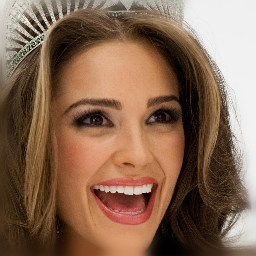

'img 0: 0_01.png'

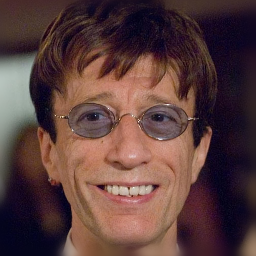

'img 1: 10000_01.png'

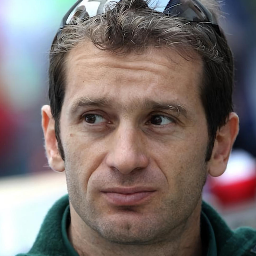

'img 2: 10001_01.png'

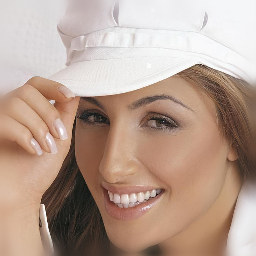

'img 3: 10002_01.png'

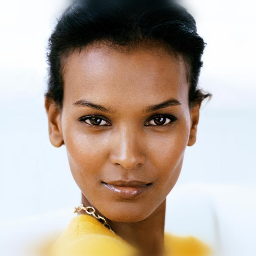

'img 4: 10003_01.png'

In [30]:
def display_folder_content(folder, res = 256):
    if folder[-1] != '/': folder += '/'
    for i, img_path in enumerate(sorted(os.listdir(folder))):
        if '.png' in img_path:
            display(Image.open(folder+img_path).resize((res,res)), 'img %d: %s' %(i, img_path))
            print('\n')
        if i == 4:
            break
      
    
display_folder_content('aligned_images')

In [31]:
!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!mkdir data
!mv finetuned_resnet.h5 data
!rm -rf generated_images latent_representations

Downloading...
From: https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
To: /root/practice/stgan1/stylegan-encoder/finetuned_resnet.h5
330MB [00:11, 29.9MB/s] 
mkdir: cannot create directory ‘data’: File exists


In [32]:
print("aligned_images contains %d images ready for encoding!" %len(os.listdir('aligned_images/')))
print("Recommended batch_size for the encode_images process: %d" %min(len(os.listdir('aligned_images/')), 8))

aligned_images contains 29844 images ready for encoding!
Recommended batch_size for the encode_images process: 8


In [54]:
import IPython.display

In [74]:
!python encode_images.py --optimizer=lbfgs --face_mask=True --iterations=6 --use_lpips_loss=0 --use_discriminator_loss=0 --output_video=True aligned_images/ generated_images/ latent_representations/
print("\n************ Latent code optimization finished! ***************")

2021-09-10 04:55:37.761247: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
Traceback (most recent call last):
  File "encode_images.py", line 242, in <module>
    main()
  File "encode_images.py", line 117, in main
    generator_network, discriminator_network, Gs_network = pickle.load(f)
_pickle.UnpicklingError: invalid load key, '\x0a'.

************ Latent code optimization finished! ***************


In [64]:
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)
#모델 디렉토리가 있어야 합니다. 없으면 만들것
model_dir = 'cache/'
model_path = [model_dir+f for f in os.listdir(model_dir) if 'stylegan-ffhq' in f][0]
print("Loading StyleGAN model from %s..." %model_path)

with dnnlib.util.open_url(model_path) as f:
  generator_network, discriminator_network, averaged_generator_network = pickle.load(f)
  
print("StyleGAN loaded & ready for sampling!")


IndexError: list index out of range

In [ ]:
def generate_images(generator, latent_vector, z = True):
    batch_size = latent_vector.shape[0]
    
    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
def plot_imgs(model, rows, columns):
    for i in range(rows):
        f, axarr = plt.subplots(1,columns, figsize = (20,8))
        for j in range(columns):
            img = generate_images(model, np.random.randn(1,512), z = True)[0]
            axarr[j].imshow(img)
            axarr[j].axis('off')
            axarr[j].set_title('Resolution: %s' %str(img.shape))
        plt.show()

In [ ]:
plot_imgs(averaged_generator_network, 3, 3)

In [ ]:
import numpy as np

for f in sorted(os.listdir('latent_representations')):
    w = np.load('latent_representations/' + f).reshape((1,18,-1))
    img = generate_images(averaged_generator_network, w, z = False)[0]
    plt.imshow(img)
    plt.axis('off')
    plt.title("Generated image from %s" %f)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_two_images(img1,img2, img_id, fs = 12):
  f, axarr = plt.subplots(1,2, figsize=(fs,fs))
  axarr[0].imshow(img1)
  axarr[0].title.set_text('Encoded img %d' %img_id)
  axarr[1].imshow(img2)
  axarr[1].title.set_text('Original img %d' %img_id)
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()

def display_sbs(folder1, folder2, res = 256):
  if folder1[-1] != '/': folder1 += '/'
  if folder2[-1] != '/': folder2 += '/'
    
  imgs1 = sorted([f for f in os.listdir(folder1) if '.png' in f])
  imgs2 = sorted([f for f in os.listdir(folder2) if '.png' in f])
  if len(imgs1)!=len(imgs2):
    print("Found different amount of images in aligned vs raw image directories. That's not supposed to happen...")
  
  for i in range(len(imgs1)):
    img1 = Image.open(folder1+imgs1[i]).resize((res,res))
    img2 = Image.open(folder2+imgs2[i]).resize((res,res))
    plot_two_images(img1,img2, i)
    print("")
     
display_sbs('generated_images/', 'aligned_images/', res = 512)

In [ ]:
good_images = [0,1]

In [ ]:
import numpy as np
latents = sorted(os.listdir('latent_representations'))

out_file = '/content/output_vectors.npy'

final_w_vectors = []
for img_id in good_images:
  w = np.load('latent_representations/' + latents[img_id])
  final_w_vectors.append(w)

final_w_vectors = np.array(final_w_vectors)
np.save(out_file, final_w_vectors)
print("%d latent vectors of shape %s saved to %s!" %(len(good_images), str(w.shape), out_file))